# Learn and Earn in 2021

[](http://)



TIME magazine officially called[ 2020, the worst year ever](https://time.com/5917394/2020-in-review/). The Covid pandemic ravaged economies around the world. At the same time bringing economic destruction on a scale hitherto unknown. 

Concurrently, companies in the tech space boomed. The combined size of `Google, Amazon, Microsoft, Apple and Facebook` is now more than those of the remaining 495 in the S&P 500. There is an explosion in the interest in education, upskilling and re-skilling across the world. Data Science was called the sexiest job of the 21st century earlier. After the pandemic, it has simply gotten irresistible. 

It is tempting to learn data science. A cursory Google search will throw up numerous data science courses. Each promising us to deliver us to the provmised land faster than most televangelists. 

<img src="https://i.ytimg.com/vi/k3h-KfsD_iw/maxresdefault.jpg" width="600">


<div><p> </div>
  





The New Year is almost upon us and if you have not already enrolled for one of the various data science programs, it is very likely that you will feel pressured to change your life in 2021 by enrolling into one. Let us explore the Kaggle ML survey from 2020 and find out what are the attributes that pay in the Data Science / Machine Learning world. My hope is that this helps set gives a realistic expectations on what can be achieved and where to concentrate your efforts in order to achieve those targets. We will try to answer - 

* Where to work?
* What to do?
* What your toolbox should look like?
* Specific ML skills to acquire?
* Where to acquire those skills?
* How to learn?



# Methodology

Before we start, let us set up our evaluation criteria. 

## 1. Earnings: 


The Kaggle Survey does not track job satisfaction, work hours and bad bosses. So we will take the salaries as a proxy. While money cannot buy us everything, we will use the Ted Turner philosophy. 

> Life is a game. Money is a way to keep score. 

Sady, this means that we will have to <span style="background:coral; font-weight:medium; color:white">leave out roughly half the respondents</span> who did not mention their salaries. 

The median US income is about USD 70,000 per year for a college graduate. Keeping this in mind, we have grouped the earnings into five categories

* Up to USD 10,000 (significantly lower than the median)
* USD 10,000 to USD 50,000 (slightly lower than the median)
* USD 50,000 to USD 80,000 (around the median)
* USD 80,000 to USD 150,000 (slighly more than the median)
* USD 150,000 and more (significantly more than the median)


## 2. Importance of attributes:

You would have heard that if you need to learn data science, you ***have*** to learn Python. While any new learning is great, we will need to know - 
* How ubiquitous is Python? 
* What is the competitive advantage one would get in the Data Science / Machine Learning world? 

If find the number of respondents using Python **(81%)**. That's a lot of people. 

And if branch the usage across various Earnings brackets, we find that the number is steady. So it might not give me a competitive edge. 


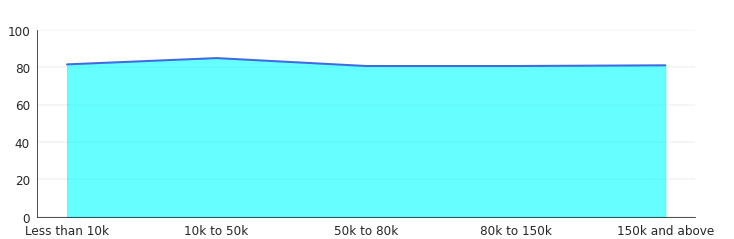



### To quantify this, we use two measures.

### Incidence: 
The fraction of people across all earnings buckets having the skill. 

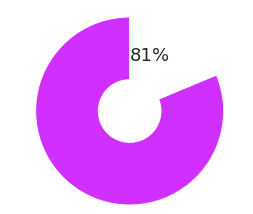

### Index: 
If we keep the incidence as the base, we can calculate the importance index. 

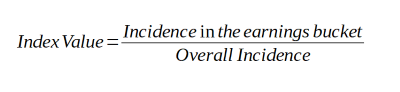

The graph then looks something like this. 

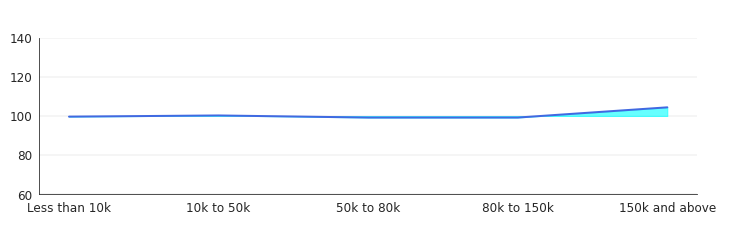

Now, if we read the two together,

-  You will arguably learn Python to do well in Data Science.
- *But just knowing Python will not give you a competitive edge.*


On the other hand an index like this gives you an attribute with a competitive edge in earnings. 

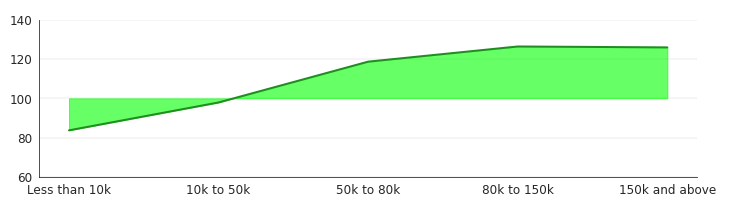

Wheras, an index like this perhaps indicates that the attribute is on the wane in the world of data science and may not help you your earnings potential. 

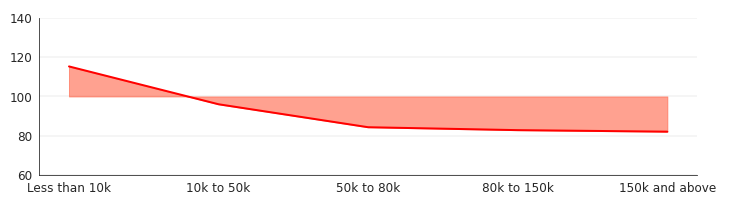


To reduce the effects of a small base, <span style="background:coral; font-weight:medium; color:white">we have considered only those attributes that have at least 10% incidence for binary questions and at least 5% incidence for MCQ questions.</span>

Let's do this.

In [1]:
!pip install seaborn --upgrade

     |████████████████████████████████| 285 kB 290 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# load the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.gridspec as gridspec


In [3]:
# Read the dataset
kaggle_2020 = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", skiprows = 1)


In [4]:
# Rename columns

col_dict = {0: 'Duration',
 1: 'Age Group',
 2: 'Gender',
 3: 'Country',
 4: 'Education Level',
 5: 'Job Title',
 6: 'Programming Experience',
 7: 'Python',
 8: 'R',
 9: 'SQL',
 10: 'C',
 11: 'C++',
 12: 'Java',
 13: 'Javascript',
 14: 'Julia',
 15: 'Swift',
 16: 'Bash',
 17: 'MATLAB',
 18: 'Progamming None',
 19: 'Programming Other',
 20: 'Recommended Language',
 21: 'Jupyter (JupyterLab, Jupyter Notebooks, etc)',
 22: 'RStudio',
 23: 'Visual Studio / Visual Studio Code',
 24: 'Click to write Choice 13',
 25: 'PyCharm',
 26: 'Spyder',
 27: 'Notepad++',
 28: 'Sublime Text',
 29: 'Vim / Emacs',
 30: 'MATLAB IDE',
 31: 'IDE None',
 32: 'IDE Other',
 33: 'Kaggle Notebooks',
 34: 'Colab Notebooks',
 35: 'Azure Notebooks',
 36: 'Paperspace / Gradient',
 37: 'Binder / JupyterHub',
 38: 'Code Ocean',
 39: 'IBM Watson Studio',
 40: 'Amazon Sagemaker Studio',
 41: 'Amazon EMR Notebooks',
 42: 'Google Cloud AI Platform Notebooks',
 43: 'Google Cloud Datalab Notebooks',
 44: 'Databricks Collaborative Notebooks',
 45: 'Hosted Notebooks None',
 46: 'Hosted Notebook Other',
 47: 'Most often used Cloud Platform',
 48: 'GPUs',
 49: 'TPUs',
 50: 'Hardware None',
 51: 'Hardware Other',
 52: 'TPU usage experience',
 53: 'Matplotlib',
 54: 'Seaborn',
 55: 'Plotly / Plotly Express',
 56: 'Ggplot / ggplot2',
 57: 'Shiny',
 58: 'D3 js',
 59: 'Altair',
 60: 'Bokeh',
 61: 'Geoplotlib',
 62: 'Leaflet / Folium',
 63: 'Visualization None',
 64: 'Visualization Other',
 65: 'ML Experience',
 66: 'Scikit-learn',
 67: 'TensorFlow',
 68: 'Keras',
 69: 'PyTorch',
 70: 'Fast.ai',
 71: 'MXNet',
 72: 'Xgboost',
 73: 'LightGBM',
 74: 'CatBoost',
 75: 'Prophet',
 76: 'H2O 3',
 77: 'Caret',
 78: 'Tidymodels',
 79: 'JAX',
 80: 'ML None',
 81: 'ML Other',
 82: 'Linear or Logistic Regression',
 83: 'Decision Trees or Random Forests',
 84: 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 85: 'Bayesian Approaches',
 86: 'Evolutionary Approaches',
 87: 'Dense Neural Networks (MLPs, etc)',
 88: 'Convolutional Neural Networks',
 89: 'Generative Adversarial Networks',
 90: 'Recurrent Neural Networks',
 91: 'Transformer Networks (BERT, gpt-3, etc)',
 92: 'ML Algorithms None',
 93: 'ML Algo Other',
 94: 'General purpose image/video tools (PIL, cv2, skimage, etc)',
 95: 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
 96: 'Object detection methods (YOLOv3, RetinaNet, etc)',
 97: 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
 98: 'Generative Networks (GAN, VAE, etc)',
 99: 'CV None',
 100: 'CV Other',
 101: 'Word embeddings/vectors (GLoVe, fastText, word2vec)',
 102: 'Encoder-decorder models (seq2seq, vanilla transformers)',
 103: 'Contextualized embeddings (ELMo, CoVe)',
 104: 'Transformer language models (GPT-3, BERT, XLnet, etc)',
 105: 'NLP None',
 106: 'NLP Other',
 107: 'Company Size',
 108: 'Data Science Team Size',
 109: 'ML Application in Company',
 110: 'Analyze and understand data to influence product or business decisions',
 111: 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
 112: 'Build prototypes to explore applying machine learning to new areas',
 113: 'Build and/or run a machine learning service that operationally improves my product or workflows',
 114: 'Experimentation and iteration to improve existing ML models',
 115: 'Do research that advances the state of the art of machine learning',
 116: 'None of these activities are an important part of my role at work',
 117: 'Work Activity Other',
 118: 'Annual Compensation',
 119: 'ML Spend',
 120: 'Amazon Web Services (AWS)',
 121: 'Microsoft Azure',
 122: 'Google Cloud Platform (GCP)',
 123: 'IBM Cloud / Red Hat',
 124: 'Oracle Cloud',
 125: 'SAP Cloud',
 126: 'Salesforce Cloud',
 127: 'VMware Cloud',
 128: 'Alibaba Cloud',
 129: 'Tencent Cloud',
 130: 'Cloud None',
 131: 'Cloud Other',
 132: 'Amazon EC2',
 133: 'AWS Lambda',
 134: 'Amazon Elastic Container Service',
 135: 'Azure Cloud Services',
 136: 'Microsoft Azure Container Instances',
 137: 'Azure Functions',
 138: 'Google Cloud Compute Engine',
 139: 'Google Cloud Functions',
 140: 'Google Cloud Run',
 141: 'Google Cloud App Engine',
 142: 'Cloud Products None',
 143: 'Cloud Product Other',
 144: 'Amazon SageMaker',
 145: 'Amazon Forecast',
 146: 'Amazon Rekognition',
 147: 'Azure Machine Learning Studio',
 148: 'Azure Cognitive Services',
 149: 'Google Cloud AI Platform / Google Cloud ML Engine',
 150: 'Google Cloud Video AI',
 151: 'Google Cloud Natural Language',
 152: 'Google Cloud Vision AI',
 153: 'ML Products None',
 154: 'ML Prod Other',
 155: 'MySQL',
 156: 'PostgresSQL',
 157: 'SQLite',
 158: 'Oracle Database',
 159: 'MongoDB',
 160: 'Snowflake',
 161: 'IBM Db2',
 162: 'Microsoft SQL Server',
 163: 'Microsoft Access',
 164: 'Microsoft Azure Data Lake Storage',
 165: 'Amazon Redshift',
 166: 'Amazon Athena',
 167: 'Amazon DynamoDB',
 168: 'Google Cloud BigQuery',
 169: 'Google Cloud SQL',
 170: 'Google Cloud Firestore',
 171: 'DW None',
 172: 'DW Other',
 173: 'Most Used Database',
 174: 'Amazon QuickSight',
 175: 'Microsoft Power BI',
 176: 'Google Data Studio',
 177: 'Looker',
 178: 'Tableau',
 179: 'Salesforce',
 180: 'Einstein Analytics',
 181: 'Qlik',
 182: 'Domo',
 183: 'TIBCO Spotfire',
 184: 'Alteryx',
 185: 'Sisense',
 186: 'SAP Analytics Cloud',
 187: 'BI None',
 188: 'BI Other',
 189: 'Most Used BI Tool',
 190: 'Automated data augmentation (e.g. imgaug, albumentations)',
 191: 'Automated feature engineering/selection (e.g. tpot, boruta_py)',
 192: 'Automated model selection (e.g. auto-sklearn, xcessiv)',
 193: 'Automated model architecture searches (e.g. darts, enas)',
 194: 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
 195: 'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)',
 196: 'Auto ML None',
 197: 'Auto ML Other',
 198: 'Google Cloud AutoML',
 199: 'H20 Driverless AI',
 200: 'Databricks AutoML',
 201: 'DataRobot AutoML',
 202: 'Tpot',
 203: 'Auto-Keras',
 204: 'Auto-Sklearn',
 205: 'Auto_ml',
 206: 'Xcessiv',
 207: 'MLbox',
 208: 'Auto ML Tools None',
 209: 'Auto ML Tools Other',
 210: 'Neptune.ai',
 211: 'Weights & Biases',
 212: 'Comet.ml',
 213: 'Sacred + Omniboard',
 214: 'TensorBoard',
 215: 'Guild.ai',
 216: 'Polyaxon',
 217: 'Trains',
 218: 'Domino Model Monitor',
 219: 'ML Tools None',
 220: 'ML Tools Other',
 221: 'Plotly Dash',
 222: 'Streamlit',
 223: 'NBViewer',
 224: 'GitHub',
 225: 'Personal blog',
 226: 'Kaggle',
 227: 'Colab',
 228: 'Shiny Deploy',
 229: 'I do not share my work publicly',
 230: 'Deploy Other',
 231: 'Coursera',
 232: 'edX',
 233: 'Kaggle Learn Courses',
 234: 'DataCamp',
 235: 'Fast.ai Learning',
 236: 'Udacity',
 237: 'Udemy',
 238: 'LinkedIn Learning',
 239: 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 240: 'University Courses (resulting in a university degree)',
 241: 'Learn ML None',
 242: 'Learn ML Other',
 243: 'Primary Analysis Tool',
 244: 'Twitter (data science influencers)',
 245: "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
 246: 'Reddit (r/machinelearning, etc)',
 247: 'Kaggle (notebooks, forums, etc)',
 248: 'Course Forums (forums.fast.ai, Coursera forums, etc)',
 249: 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
 250: 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
 251: 'Blogs (Towards Data Science, Analytics Vidhya, etc)',
 252: 'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
 253: 'Slack Communities (ods.ai, kagglenoobs, etc)',
 254: 'Media None',
 255: 'Media Other',
 256: 'Aspire Amazon Web Services (AWS)',
 257: 'Aspire Microsoft Azure',
 258: 'Aspire Google Cloud Platform (GCP)',
 259: 'Aspire IBM Cloud / Red Hat',
 260: 'Aspire Oracle Cloud',
 261: 'Aspire SAP Cloud',
 262: 'Aspire VMware Cloud',
 263: 'Aspire Salesforce Cloud',
 264: 'Aspire Alibaba Cloud',
 265: 'Aspire Tencent Cloud',
 266: 'Aspire Cloud None',
 267: 'Aspire Cloud Other',
 268: 'Aspire Amazon EC2',
 269: 'Aspire AWS Lambda',
 270: 'Aspire Amazon Elastic Container Service',
 271: 'Aspire Azure Cloud Services',
 272: 'Aspire Microsoft Azure Container Instances',
 273: 'Aspire Azure Functions',
 274: 'Aspire Google Cloud Compute Engine',
 275: 'Aspire Google Cloud Functions',
 276: 'Aspire Google Cloud Run',
 277: 'Aspire Google Cloud App Engine',
 278: 'Aspire Cloud Products None',
 279: 'Aspire Cloud Products Other',
 280: 'Aspire Amazon SageMaker',
 281: 'Aspire Amazon Forecast',
 282: 'Aspire Amazon Rekognition',
 283: 'Aspire Azure Machine Learning Studio',
 284: 'Aspire Azure Cognitive Services',
 285: 'Aspire Google Cloud AI Platform / Google Cloud ML Engine',
 286: 'Aspire Google Cloud Video AI',
 287: 'Aspire Google Cloud Natural Language',
 288: 'Aspire Google Cloud Vision AI',
 289: 'Aspire ML None',
 290: 'Aspire ML Other',
 291: 'Aspire MySQL',
 292: 'Aspire PostgresSQL',
 293: 'Aspire SQLite',
 294: 'Aspire Oracle Database',
 295: 'Aspire MongoDB',
 296: 'Aspire Snowflake',
 297: 'Aspire IBM Db2',
 298: 'Aspire Microsoft SQL Server',
 299: 'Aspire Microsoft Access',
 300: 'Aspire Microsoft Azure Data Lake Storage',
 301: 'Aspire Amazon Redshift',
 302: 'Aspire Amazon Athena',
 303: 'Aspire Amazon DynamoDB',
 304: 'Aspire Google Cloud BigQuery',
 305: 'Aspire Google Cloud SQL',
 306: 'Aspire Google Cloud Firestore',
 307: 'Aspire DW None',
 308: 'Aspire DW Other',
 309: 'Aspire Microsoft Power BI',
 310: 'Aspire Amazon QuickSight',
 311: 'Aspire Google Data Studio',
 312: 'Aspire Looker',
 313: 'Aspire Tableau',
 314: 'Aspire Salesforce',
 315: 'Aspire Einstein Analytics',
 316: 'Aspire Qlik',
 317: 'Aspire Domo',
 318: 'Aspire TIBCO Spotfire',
 319: 'Aspire Alteryx',
 320: 'Aspire Sisense',
 321: 'Aspire SAP Analytics Cloud',
 322: 'Aspire BI None',
 323: 'Aspire BI Other',
 324: 'Aspire Automated data augmentation (e.g. imgaug, albumentations)',
 325: 'Aspire Automated feature engineering/selection (e.g. tpot, boruta_py)',
 326: 'Aspire Automated model selection (e.g. auto-sklearn, xcessiv)',
 327: 'Aspire Automated model architecture searches (e.g. darts, enas)',
 328: 'Aspire Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
 329: 'Aspire Automation of full ML pipelines (e.g. Google Cloud AutoML, H20 Driverless AI)',
 330: 'Aspire AutoML None',
 331: 'Aspire AutoML Other',
 332: 'Aspire Google Cloud AutoML',
 333: 'Aspire H20 Driverless AI',
 334: 'Aspire Databricks AutoML',
 335: 'Aspire DataRobot AutoML',
 336: 'Aspire Tpot',
 337: 'Aspire Auto-Keras',
 338: 'Aspire Auto-Sklearn',
 339: 'Aspire Auto_ml',
 340: 'Aspire Xcessiv',
 341: 'Aspire MLbox',
 342: 'Aspire AutoML B None',
 343: 'Aspire AutoML B Other',
 344: 'Aspire Neptune.ai',
 345: 'Aspire Weights & Biases',
 346: 'Aspire Comet.ml',
 347: 'Aspire Sacred + Omniboard',
 348: 'Aspire TensorBoard',
 349: 'Aspire Guild.ai',
 350: 'Aspire Polyaxon',
 351: 'Aspire Trains',
 352: 'Aspire Domino Model Monitor',
 353: 'Aspire ML Tools  None',
 354: 'Aspire ML Tools Other'}

kaggle_2020.columns = np.arange(len(kaggle_2020.columns))
kaggle_2020 = kaggle_2020.rename(columns = col_dict)

# Drop mising salaries
kaggle_2020.dropna(subset=["Annual Compensation"], inplace = True)
# kaggle_2020["Annual Compensation"].value_counts(dropna = False)


In [5]:
# Bucket Salaries

salary_dict = {
    'Missing' : 'Missing' ,
'$0-999' : 'Less than 10k' ,
'1,000-1,999' : 'Less than 10k' ,
'2,000-2,999' : 'Less than 10k' ,
'3,000-3,999' : 'Less than 10k' ,
'4,000-4,999' : 'Less than 10k' ,
'5,000-7,499' : 'Less than 10k' ,
'7,500-9,999' : 'Less than 10k' ,
'10,000-14,999' : '10k to 50k' ,
'15,000-19,999' : '10k to 50k' ,
'20,000-24,999' : '10k to 50k' ,
'25,000-29,999' : '10k to 50k' ,
'30,000-39,999' : '10k to 50k' ,
'40,000-49,999' : '10k to 50k' ,
'50,000-59,999' : '50k to 80k' ,
'60,000-69,999' : '50k to 80k' ,
'70,000-79,999' : '50k to 80k' ,
'100,000-124,999' : '80k to 150k' ,
'125,000-149,999' : '80k to 150k' ,
'80,000-89,999' : '80k to 150k' ,
'90,000-99,999' : '80k to 150k' ,
'> $500,000' : '150k and above' ,
'150,000-199,999' : '150k and above' ,
'200,000-249,999' : '150k and above' ,
'250,000-299,999' : '150k and above' ,
'300,000-500,000' : '150k and above'
}

kaggle_2020["Earnings"] = kaggle_2020["Annual Compensation"].replace(salary_dict)

# Create order list
chart_order = CategoricalDtype(
    ["Less than 10k", "10k to 50k", "50k to 80k", "80k to 150k", "150k and above"], 
    ordered=True
)

chart_order_list  = ["Less than 10k", "10k to 50k", "50k to 80k", "80k to 150k", "150k and above"]

agg_earnings = kaggle_2020["Earnings"].value_counts(sort = False).to_frame().rename(columns = {"Earnings" : "count"} )



In [6]:
# Create Data Wrangling and Dashboard functions


# For Y/N fields
def cross_tab_row(input_df, varname, index_var, out_text):
    
    out_df = pd.crosstab(columns = input_df[varname], index = input_df[index_var],
                         values = input_df[index_var], aggfunc = "count").fillna(0)
    
    out_df.columns = np.arange(len(out_df.columns))
    out_df.rename(columns = {0 : "count"}, inplace = True)

    overall_val = input_df[varname].dropna().value_counts()[0] / input_df.shape[0]
    out_df = out_df.div(agg_earnings).reset_index().rename(columns = {"index" : index_var}).reset_index(drop = True)
    out_df[varname] = out_df["count"] / overall_val * 100
    out_df[varname].fillna(0, inplace = True)
    out_df.drop(columns = {"count"}, inplace = True)
    index_range = max(out_df[varname]) - min(out_df[varname])
    min_val = min(out_df[varname])
    max_val = max(out_df[varname])
    out_df[index_var] = out_df[index_var].astype(chart_order)
    out_df.sort_values(index_var, inplace = True)
    
    return out_df, overall_val, index_range, min_val, max_val, out_text


# For Multiple Choice Fields
def cross_tab_mat(input_df, varname, index_var):
    out_list = []
    agg_earnings_mat = pd.crosstab(index = input_df[index_var], columns = input_df[varname], values = input_df[varname], aggfunc = "count", margins = True, margins_name = "Overall", normalize = "columns").fillna(0)
    agg_earnings_mat = agg_earnings_mat.loc[agg_earnings_mat["Overall"] >= 0.05]
    overall_vals = agg_earnings_mat[["Overall"]]
    agg_earnings_mat = agg_earnings_mat.T.drop("Overall")
    cols_list = agg_earnings_mat.columns.to_list()
    for col in cols_list:
        base_val = overall_vals.loc[col, "Overall"]
        out_df = agg_earnings_mat[[col]].reset_index()
        out_df[col] = out_df[col]/ base_val * 100
        index_range = max(out_df[col]) - min(out_df[col])
        min_val = min(out_df[col])
        max_val = max(out_df[col])
        out_df["Earnings"] = out_df["Earnings"].astype(chart_order)
        out_df.sort_values("Earnings", inplace = True)
        row_list = [out_df, base_val, index_range, min_val, max_val, col]
        out_list.append(row_list)
    
    return out_list


# setup fonts
headfont = {'fontname':'Lato'}
subphfont = {'fontname':'Liberation Serif'}
axisfont = {'fontname':'Liberation Sans Narrow'}

# Create Chart Functions
def create_plot(input_list, subptitle_inp):
    
    N = len(input_list)
    plt.close()
    #set style
    sns.set_style("white")
    fig = plt.figure(constrained_layout=True, figsize = (12 ,(2.5 * N)))
    fig.set_dpi(100)
    fig.set_constrained_layout_pads(hspace=0.2, wspace=0.1)
    gs = fig.add_gridspec(nrows = N, ncols = 3)
    
    fig.suptitle(subptitle_inp, fontsize=20, x = 0.0, ha = "left", y = 1.04, va = "top", **headfont, fontweight = "bold")
    fig.text(x = 0.85, y = 1.03, s = "Incidence", fontsize=20, fontweight = "medium", **headfont)

    # create the axes
    axs = []
    paxs = []
    
    for i in range(N):
        # Set plot title
        plot_title = input_list[i][-1]
        # Get plot data
        input_df = input_list[i][0]
        # Set limits
        min_idx = int(input_list[i][3] / 10) * 10
        max_idx = int(input_list[i][4] / 10) * 10 + 30
        ylim_min = min(60, min_idx)
        ylim_max = max(140, max_idx)
        # Set colors
        idx_range = input_list[i][2]
        max_earn_idx = float(input_list[i][0].loc[input_list[i][0]["Earnings"] == "150k and above"].iloc[:,1])
        min_earn_idx = float(input_list[i][0].loc[input_list[i][0]["Earnings"] == "Less than 10k"].iloc[:,1])
        if idx_range < 30:
            lcolor = "royalblue"
            fill_color = "aqua"
        elif ((max_earn_idx < 100 and min_earn_idx < 100) or (max_earn_idx > 100 and min_earn_idx > 100)):
            lcolor = "royalblue"
            fill_color = "aqua"
        elif max_earn_idx < 100:
            lcolor = "red"
            fill_color = "tomato"
        else:
            lcolor = "forestgreen"
            fill_color = "lime"
    
        
        axs.append(fig.add_subplot(gs[i, :-1]))
        axs[i].set_title(plot_title, fontsize=16, x = 0.05, y = 0.9, ha = "left", **subphfont, fontweight = "medium")
        x = np.arange(5)
        y = input_df.iloc[:,-1]
        plt.xticks(np.arange(5), chart_order_list, ha = "center", fontsize = 12, **axisfont)
        plt.grid(color = "gray", linewidth = 1.5, linestyle = "-", axis = "y", alpha = 0.1)
        plt.yticks(fontsize = 12, **axisfont)
        axs[i].margins(x = 0.05, y = 0)
        axs[i].plot(x, y, color=lcolor, lw=2)
        plt.ylim(bottom = ylim_min, top = ylim_max)
        axs[i].fill_between(x,100, y, color = fill_color, alpha = 0.6)
        
#         if i != N-1:
#             plt.setp(axs[i].get_xticklabels(), visible=False)

        # Add pie charts
        paxs.append(fig.add_subplot(gs[i,-1]))
        col_pal = plt.cm.cool
        paxs[i].axis('equal')
        pie_val = input_list[i][1]
        group_size = [pie_val,1-pie_val] 
        mypie, _ = paxs[i].pie(group_size, radius=1.2, colors=[col_pal(pie_val), "white"], startangle = 90)
        plt.setp( mypie, width=0.8, edgecolor='white')
        paxs[i].text(x = 0., y = 0.8, s = "{:.0%}".format(pie_val), fontsize=18, **axisfont)

    sns.despine()
    plt.show();


# Where to work?


As with any other profession, we cannot exist in silos. We may have impressions of Data Scientists being super nerdy folks working in isolation tapping away at the keyboard. But in reality, Data Science is a collaborative effort. And you need the right environment to grow and prosper. So if you are planning to switch jobs in 2021, here are few factors that you mind want to consider. 

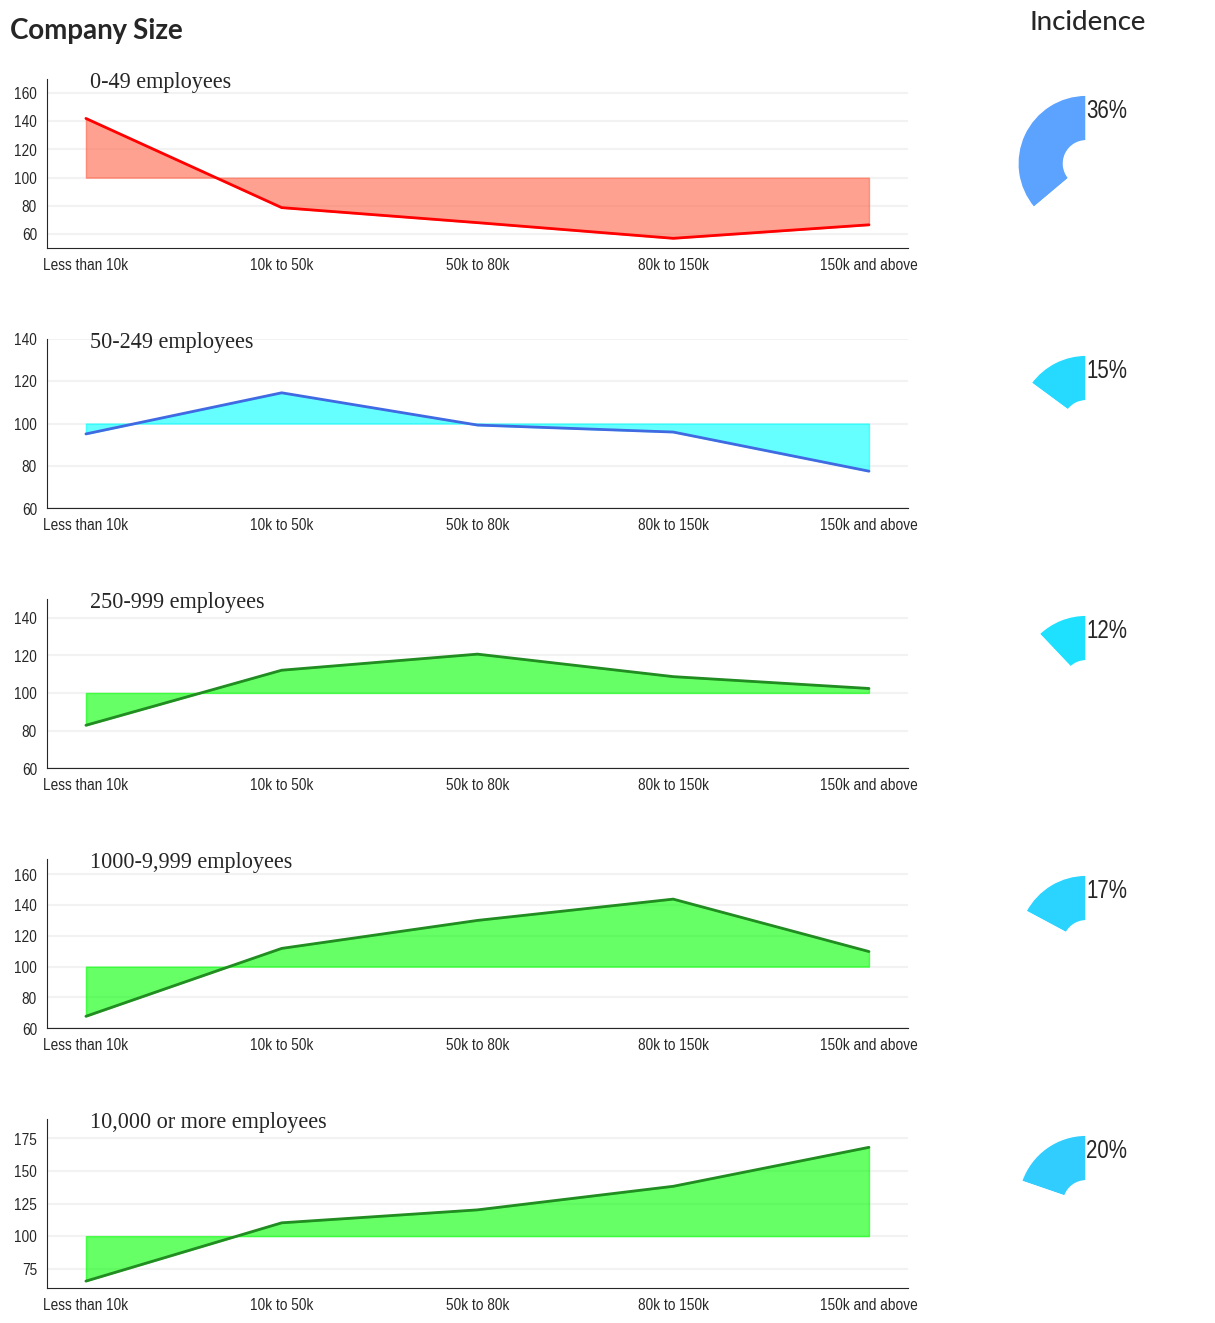

In [7]:
# Company Size
kaggle_2020["Company Size"].value_counts(dropna = False)

company_size_order = CategoricalDtype(
    ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"], 
    ordered=True
)

company_size_list = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"] 

kaggle_2020["Company Size"] = kaggle_2020["Company Size"].astype(company_size_order)
kaggle_2020.sort_values("Company Size", inplace = True)
csize_list = cross_tab_mat(kaggle_2020[["Earnings", "Company Size"]], "Earnings", "Company Size")
create_plot(csize_list, "Company Size")

There is a <span style="background:lawngreen; font-weight:medium; color:white">direct relationship</span> between the company size (by number of employees) and earnings. This might be perhaps because

* A large company can afford to pay you more. 
* It can arguably afford the data science / machine learning infrastructure. 
* It can invest in continuous learning
* It exposes you to a varied group of team mates to help you learn. 
 

#### 📌**Move to a large company to grow.**



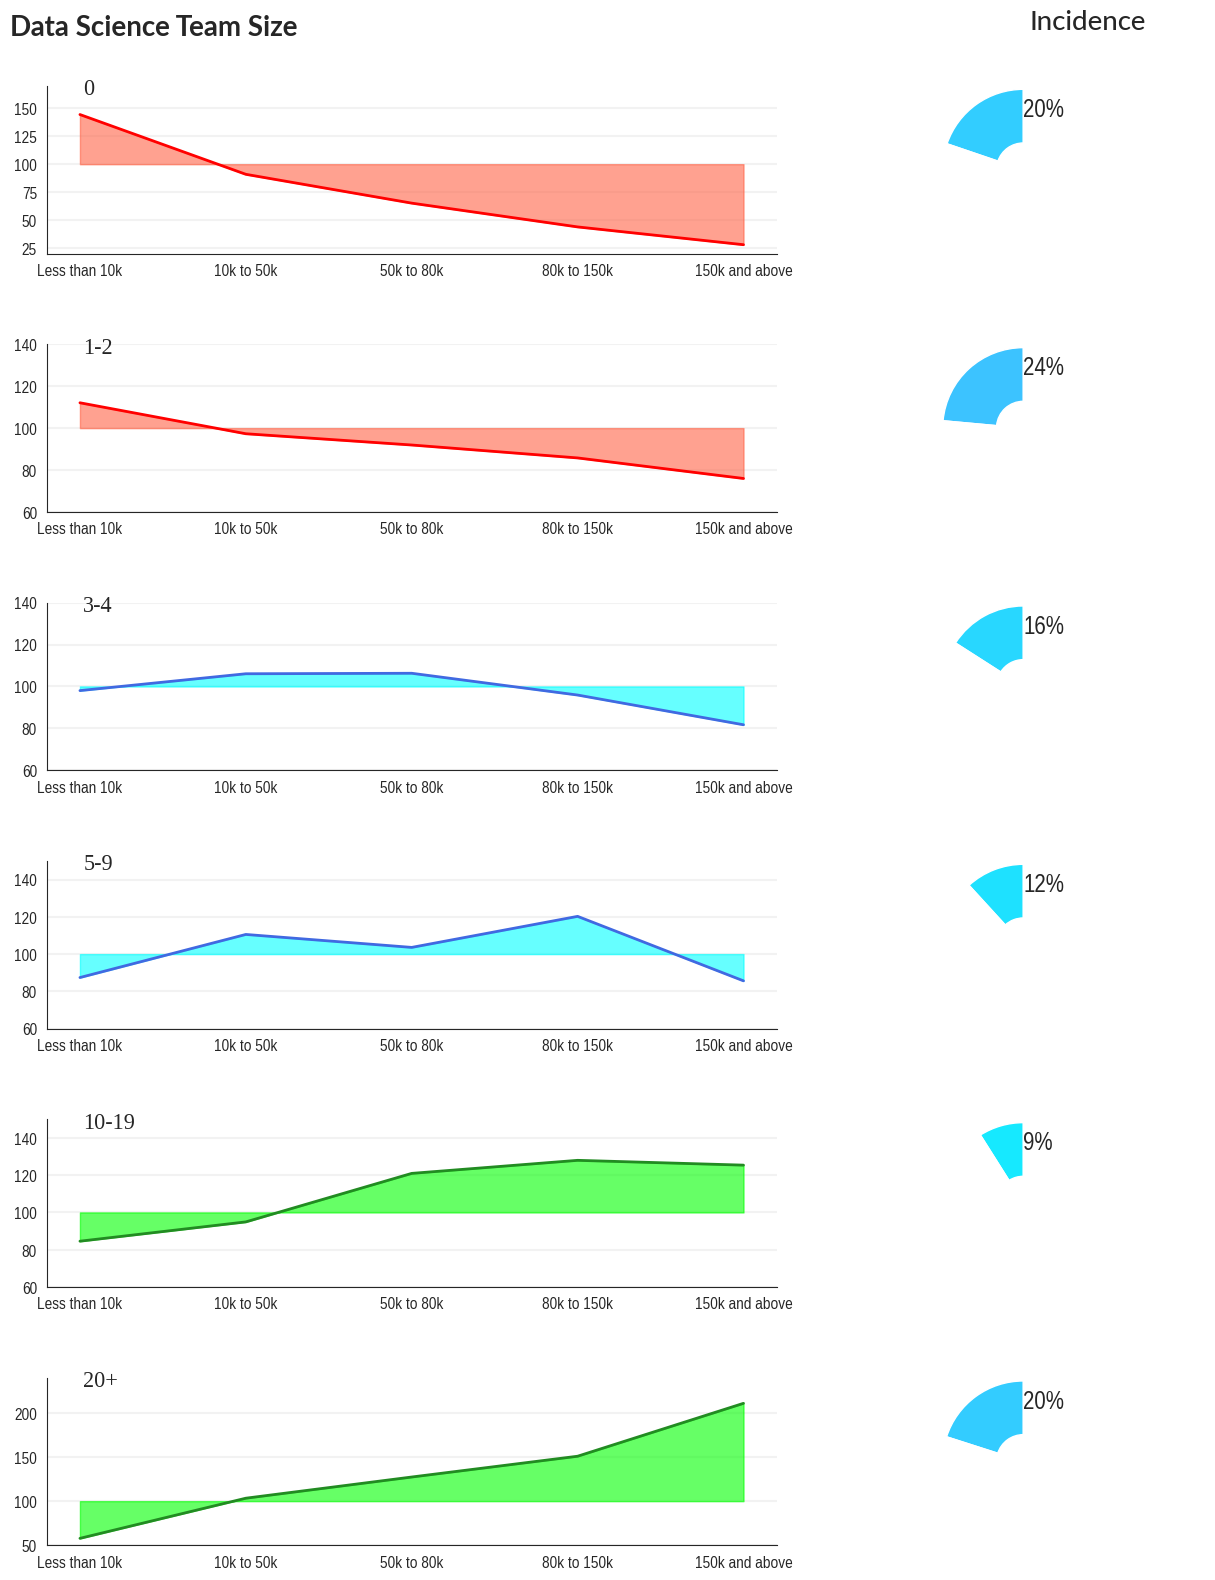

In [8]:
# Data Science Team Size

kaggle_2020["Data Science Team Size"] = kaggle_2020["Data Science Team Size"].apply(lambda x: "10-19" if x in ["10-14", "15-19"] else x)

ds_team_size_order = CategoricalDtype(
    ["0", "1-2", "3-4", "5-9", "10-19", "20+"], 
    ordered=True
)

ds_team_list = ["0", "1-2", "3-4", "5-9", "10-19", "20+"]

kaggle_2020["Data Science Team Size"] = kaggle_2020["Data Science Team Size"].astype(ds_team_size_order)
kaggle_2020.sort_values("Data Science Team Size", inplace = True)
ds_team_list = cross_tab_mat(kaggle_2020[["Earnings", "Data Science Team Size"]], "Earnings", "Data Science Team Size")
create_plot(ds_team_list, "Data Science Team Size")

As with company size of the company, there is a <span style="background:lawngreen; font-weight:medium; color:white">direct relationship</span> between the data science team size and earnings. This might be because - 

`You will get access to not only a wide variety of team members, but will also be sharing responsibilities and can therefore get more opportunities to network and learn`

#### 📌**It makes sense to work in a large Data Science team**


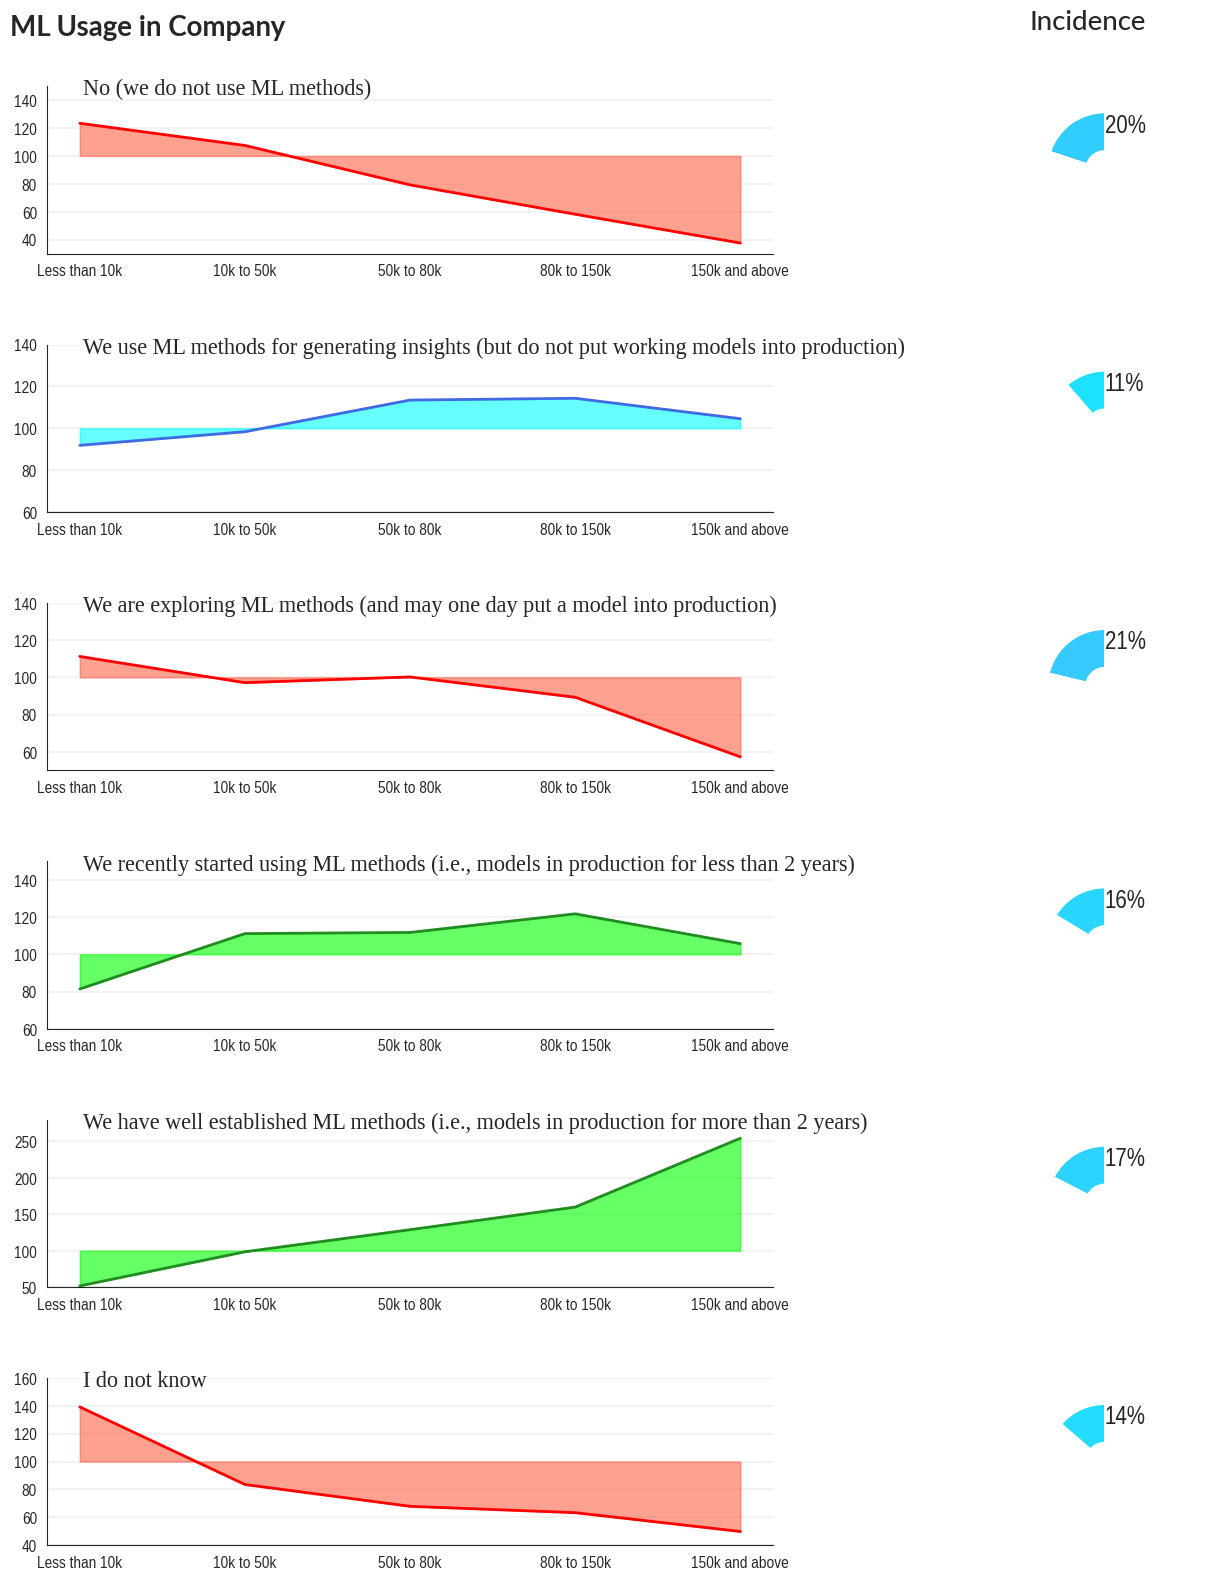

In [9]:
# ML Usage in Company

ml_usage_order = CategoricalDtype(["No (we do not use ML methods)", 
                                  "We use ML methods for generating insights (but do not put working models into production)",
                                  "We are exploring ML methods (and may one day put a model into production)",
                                  "We recently started using ML methods (i.e., models in production for less than 2 years)",
                                  "We have well established ML methods (i.e., models in production for more than 2 years)",
                                  "I do not know"], ordered=True
                                 )

ml_usage_list = ["No (we do not use ML methods)", 
                "We use ML methods for generating insights (but do not put working models into production)",
                "We are exploring ML methods (and may one day put a model into production)",
                "We recently started using ML methods (i.e., models in production for less than 2 years)",
                "We have well established ML methods (i.e., models in production for more than 2 years)",
                "I do not know"]

kaggle_2020["ML Application in Company"] = kaggle_2020["ML Application in Company"].astype(ml_usage_order)
kaggle_2020.sort_values("ML Application in Company", inplace = True)
ml_use_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Application in Company"]], "Earnings", "ML Application in Company")
create_plot(ml_use_list, "ML Usage in Company")

You might get the kicks out of trying out *new stuff*, but to earn, you need to work *and excel* in a company with an established Data Science / Machine Learning practice. 


* A company with an established practice will help weed out impractical or unfeasible ideas. 
* You will meet great mentors, who will guide you in your journey. 
 
#### 📌 **Working in a company that has a stable ML practice can be valuable, especially in the early stages of your career**  

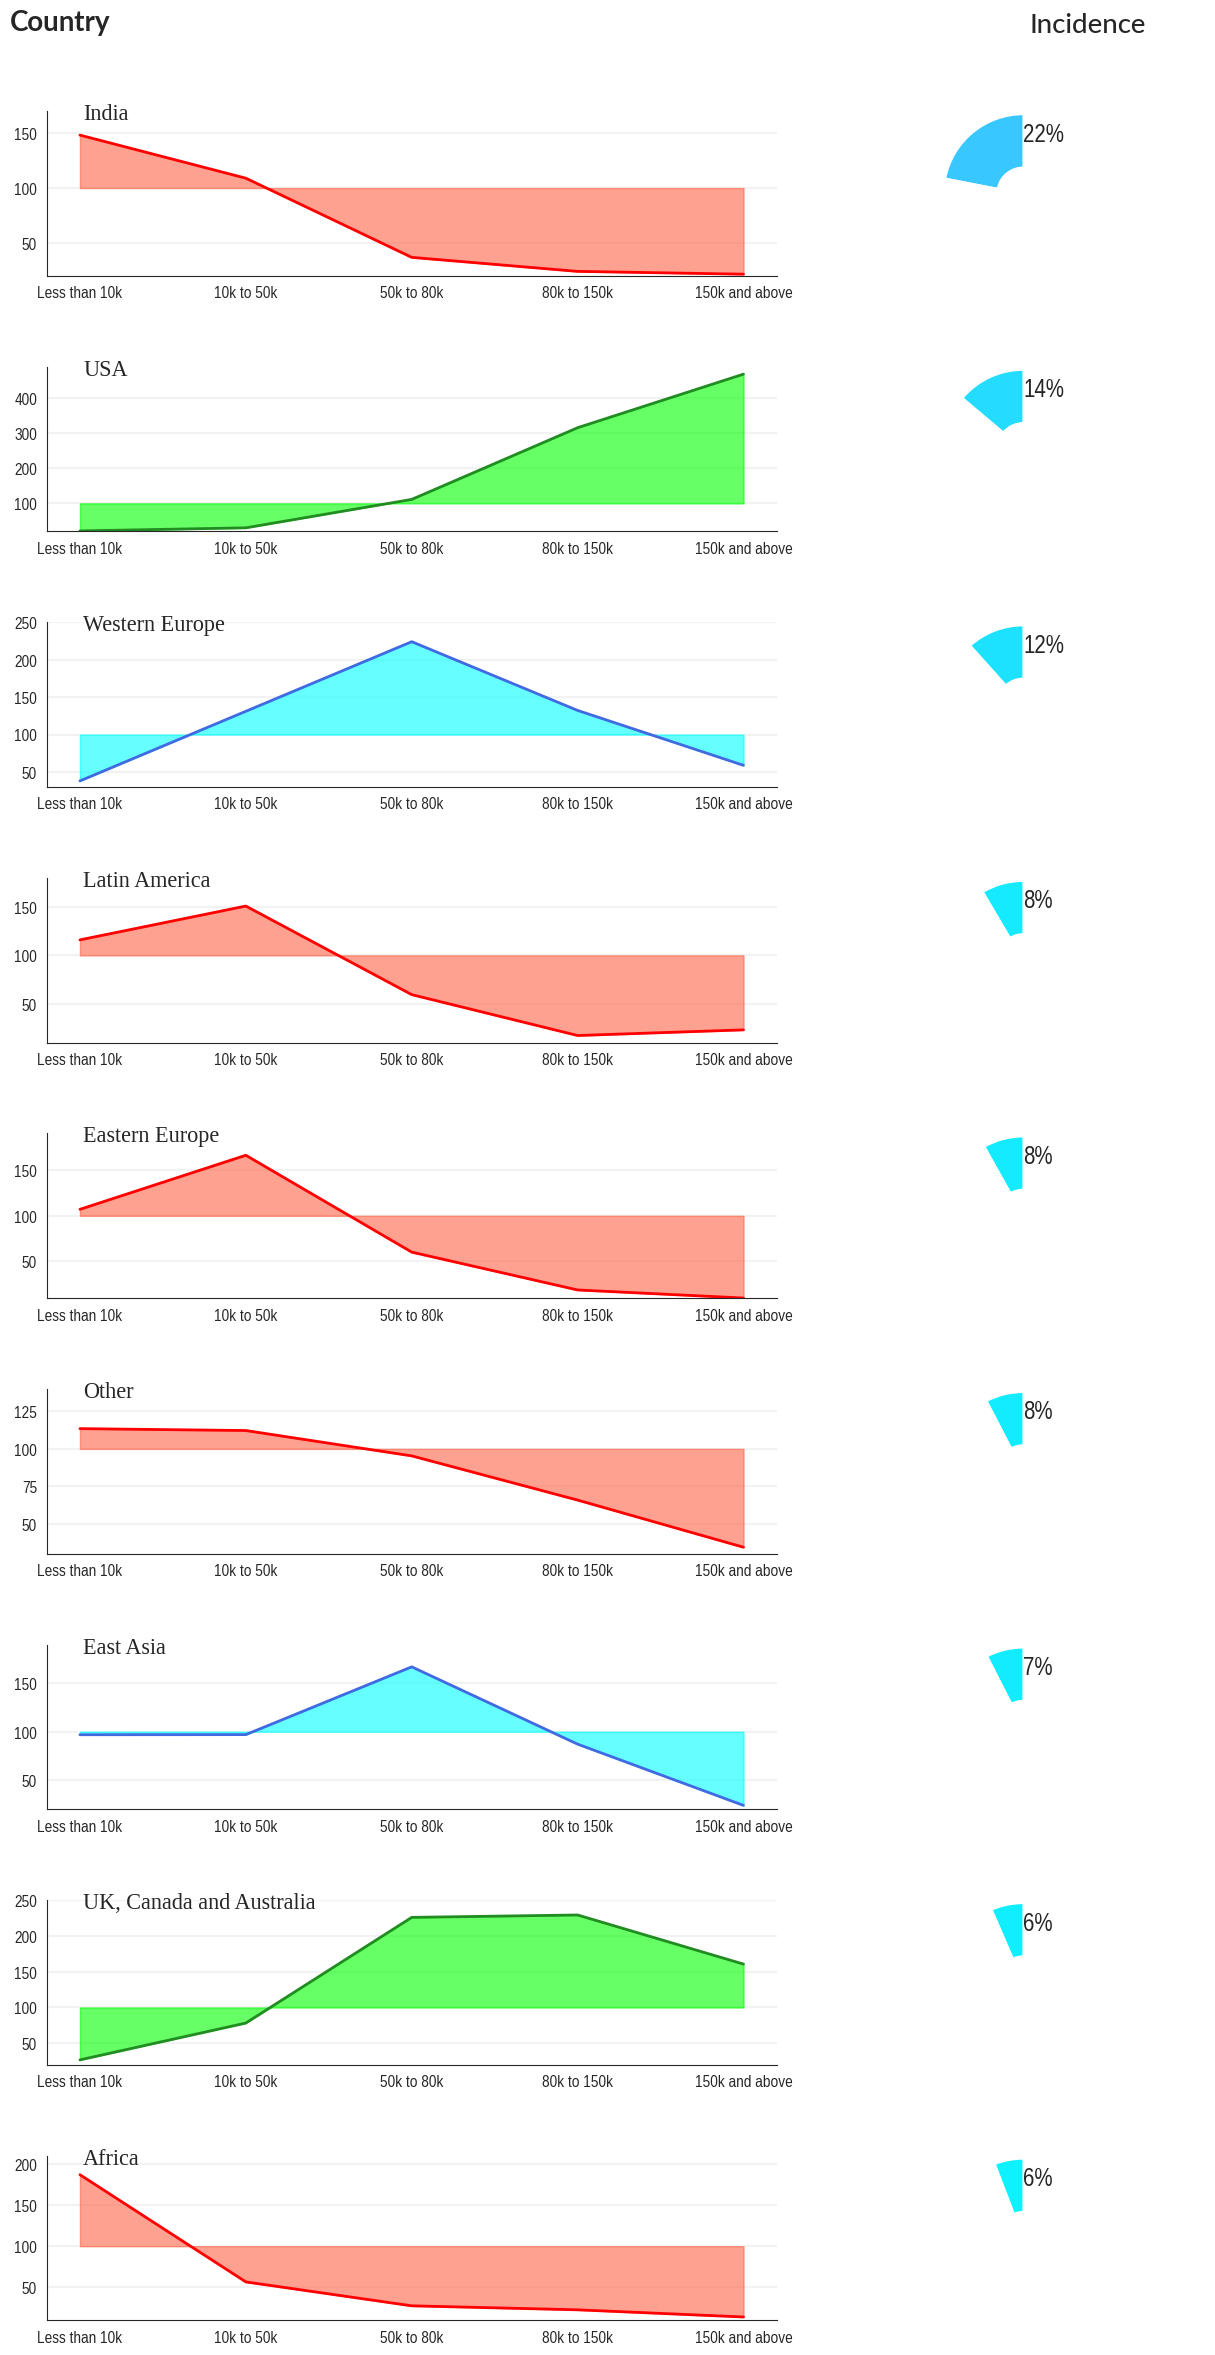

In [10]:
# Country

country_dict = {
'India' : 'India',
'United States of America' : 'USA',
'Other' : 'Other',
'Brazil' : 'Latin America',
'Japan' : 'East Asia',
'Russia' : 'Eastern Europe',
'United Kingdom of Great Britain and Northern Ireland' : 'UK, Canada and Australia',
'Nigeria' : 'Africa',
'China' : 'East Asia',
'Germany' : 'Western Europe',
'Turkey' : 'Eastern Europe',
'Spain' : 'Western Europe',
'France' : 'Western Europe',
'Canada' : 'UK, Canada and Australia',
'Indonesia' : 'South East Asia',
'Pakistan' : 'South Asia',
'Italy' : 'Western Europe',
'Taiwan' : 'East Asia',
'Australia' : 'UK, Canada and Australia',
'Mexico' : 'Latin America',
'South Korea' : 'East Asia',
'Egypt' : 'Africa',
'Colombia' : 'Latin America',
'Ukraine' : 'Eastern Europe',
'Iran, Islamic Republic of...' : 'West Asia',
'Kenya' : 'Africa',
'Netherlands' : 'Western Europe',
'Singapore' : 'South East Asia',
'Poland' : 'Eastern Europe',
'Viet Nam' : 'South East Asia',
'Bangladesh' : 'South Asia',
'South Africa' : 'Africa',
'Argentina' : 'Latin America',
'Morocco' : 'Africa',
'Malaysia' : 'South East Asia',
'Thailand' : 'South East Asia',
'Portugal' : 'Western Europe',
'Greece' : 'Eastern Europe',
'Philippines' : 'South East Asia',
'Tunisia' : 'Africa',
'Israel' : 'West Asia',
'Peru' : 'Latin America',
'Chile' : 'Latin America',
'Sweden' : 'Western Europe',
'Saudi Arabia' : 'West Asia',
'Republic of Korea' : 'East Asia',
'Sri Lanka' : 'South Asia',
'Switzerland' : 'Western Europe',
'Nepal' : 'South Asia',
'Romania' : 'Eastern Europe',
'Belgium' : 'Western Europe',
'United Arab Emirates' : 'West Asia',
'Belarus' : 'Eastern Europe',
'Ireland' : 'Western Europe',
'Ghana' : 'Africa'
}
kaggle_2020["Region"] = kaggle_2020["Country"].replace(country_dict)
country_list = cross_tab_mat(kaggle_2020[["Earnings", "Region"]], "Earnings", "Region")
country_list.sort(key=lambda x: x[1], reverse = True)
create_plot(country_list, "Country")

There are some clear winners and losers when in comes to job location. 

* America remains the land of opportunity. 
* UK, Canada and Australia are the next destinations.
* Most other places including Western Europe drop off in in the higher earnings bucket. 

`This might be explained by a lack of large companies involved in the field in Western Europe`

* India is super competitive. So very few top paying jobs are available there. 

#### 📌 **Move to USA if you want to earn serious money in Data Science**

# What to do?

So you have moved to the right place. What do you do when you get there? Let us explore what kind of work pays you. 

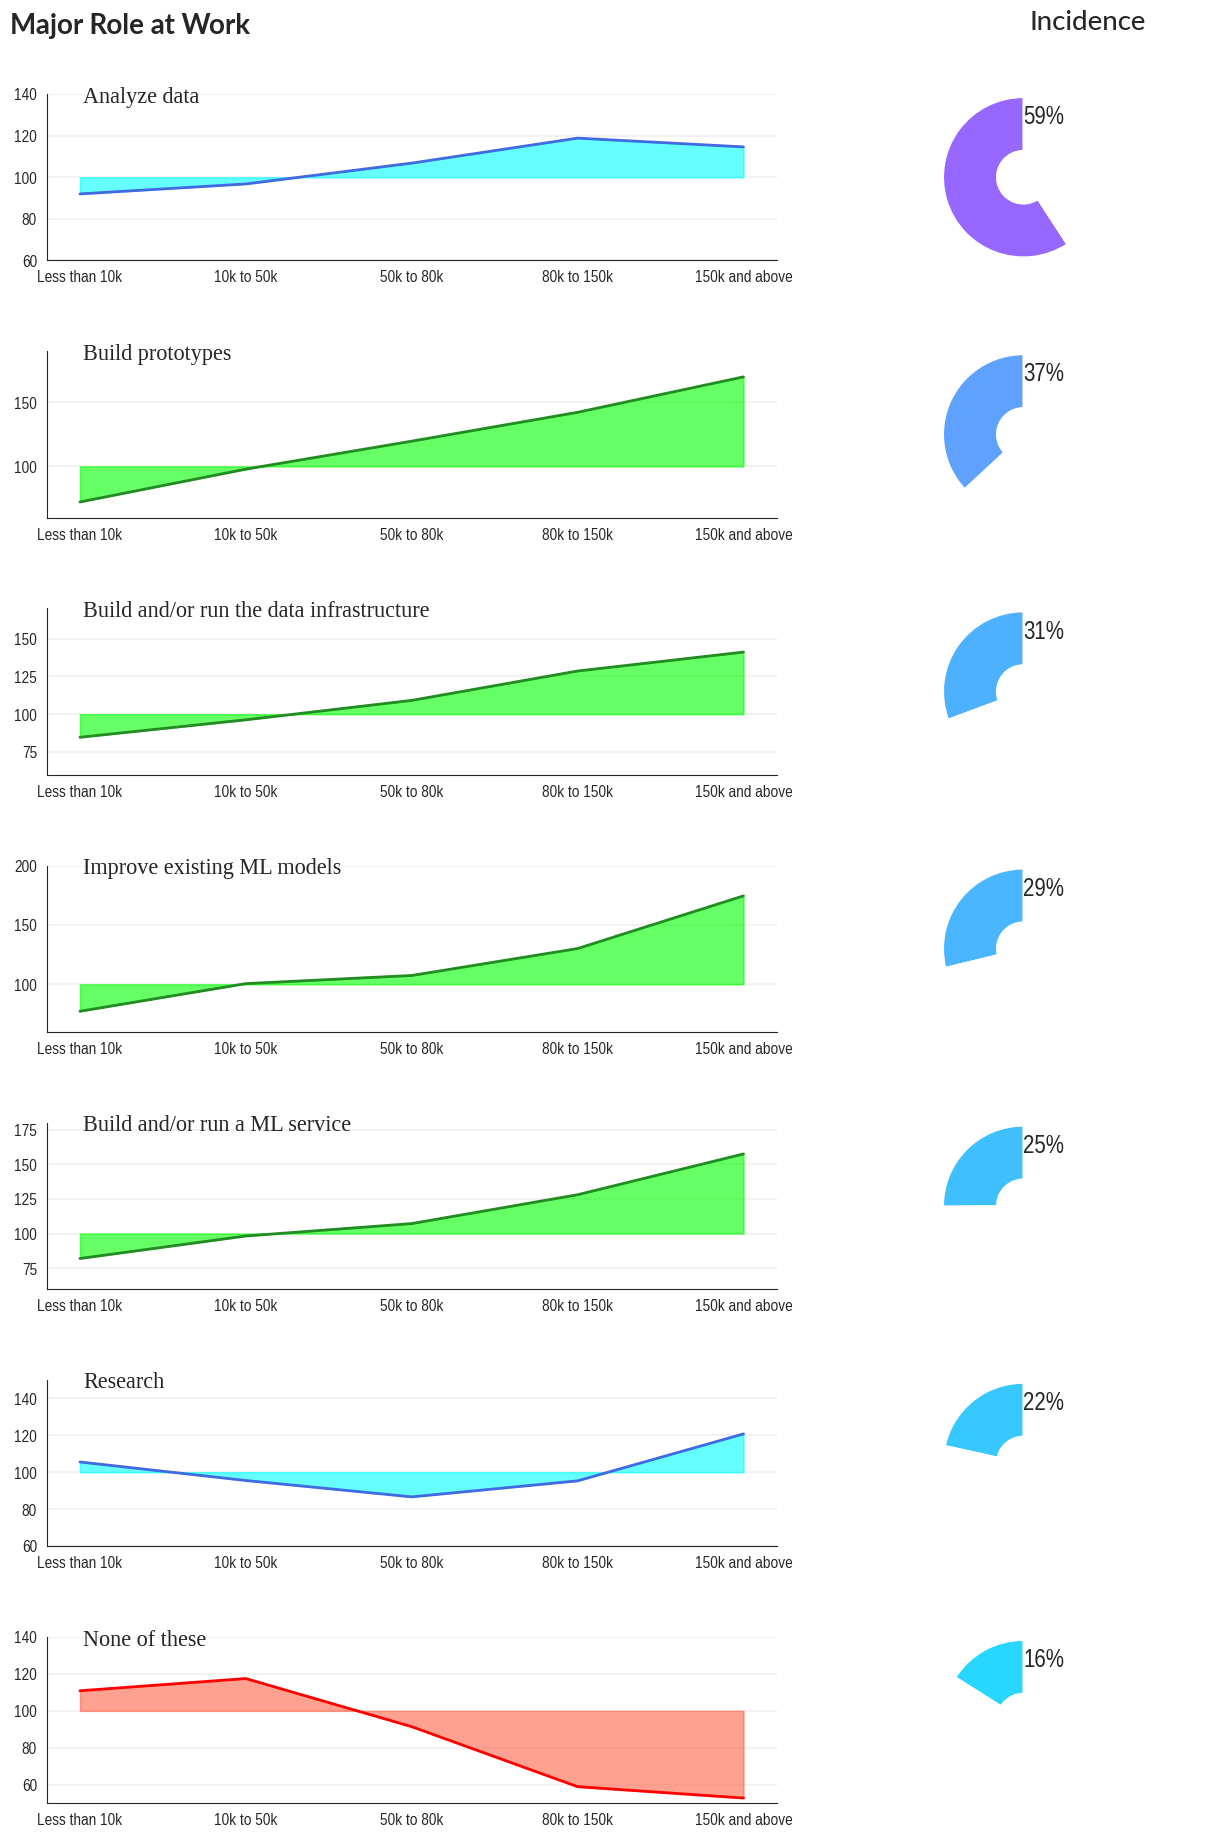

In [11]:
# Role at work

work_role = ['Analyze and understand data to influence product or business decisions',
'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
'Build prototypes to explore applying machine learning to new areas',
'Build and/or run a machine learning service that operationally improves my product or workflows',
'Experimentation and iteration to improve existing ML models',
'Do research that advances the state of the art of machine learning',
'None of these activities are an important part of my role at work',
'Work Activity Other'
]

work_role_out = ['Analyze data',
'Build and/or run the data infrastructure',
'Build prototypes',
'Build and/or run a ML service',
'Improve existing ML models',
'Research',
'None of these',
'Work Activity Other'
]

work_role_list = []
i = 0
for list_val in work_role:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", work_role_out[i])
    if ct_out[1] >= 0.1:
        work_role_list.append(ct_out)
    i +=1

# sort output list
work_role_list.sort(key = lambda x:x[1], reverse = True)

create_plot(work_role_list, "Major Role at Work")

Not all roles in the Data Science world are equal. The pay almost mirrors the [Bloom's taxonomy](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/#:~:text=Familiarly%20known%20as%20Bloom's%20Taxonomy,Analysis%2C%20Synthesis%2C%20and%20Evaluation.) for teaching. 

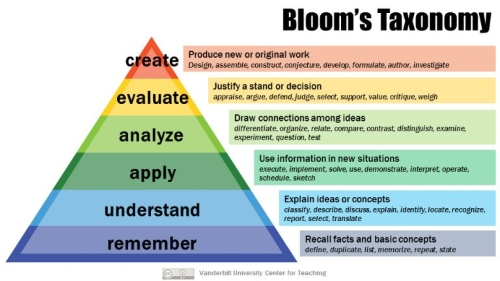

* Data Analysis shows promise but cannot compete with the salaries at the higher end. 
* However, Data Analyst positions *might* be a stepping stone to get into Data Science. 
* Research does not pay too much. Data Science isn't and exact science after all!!

#### 📌 *To earn money in Data Science you need to get your hands dirty*


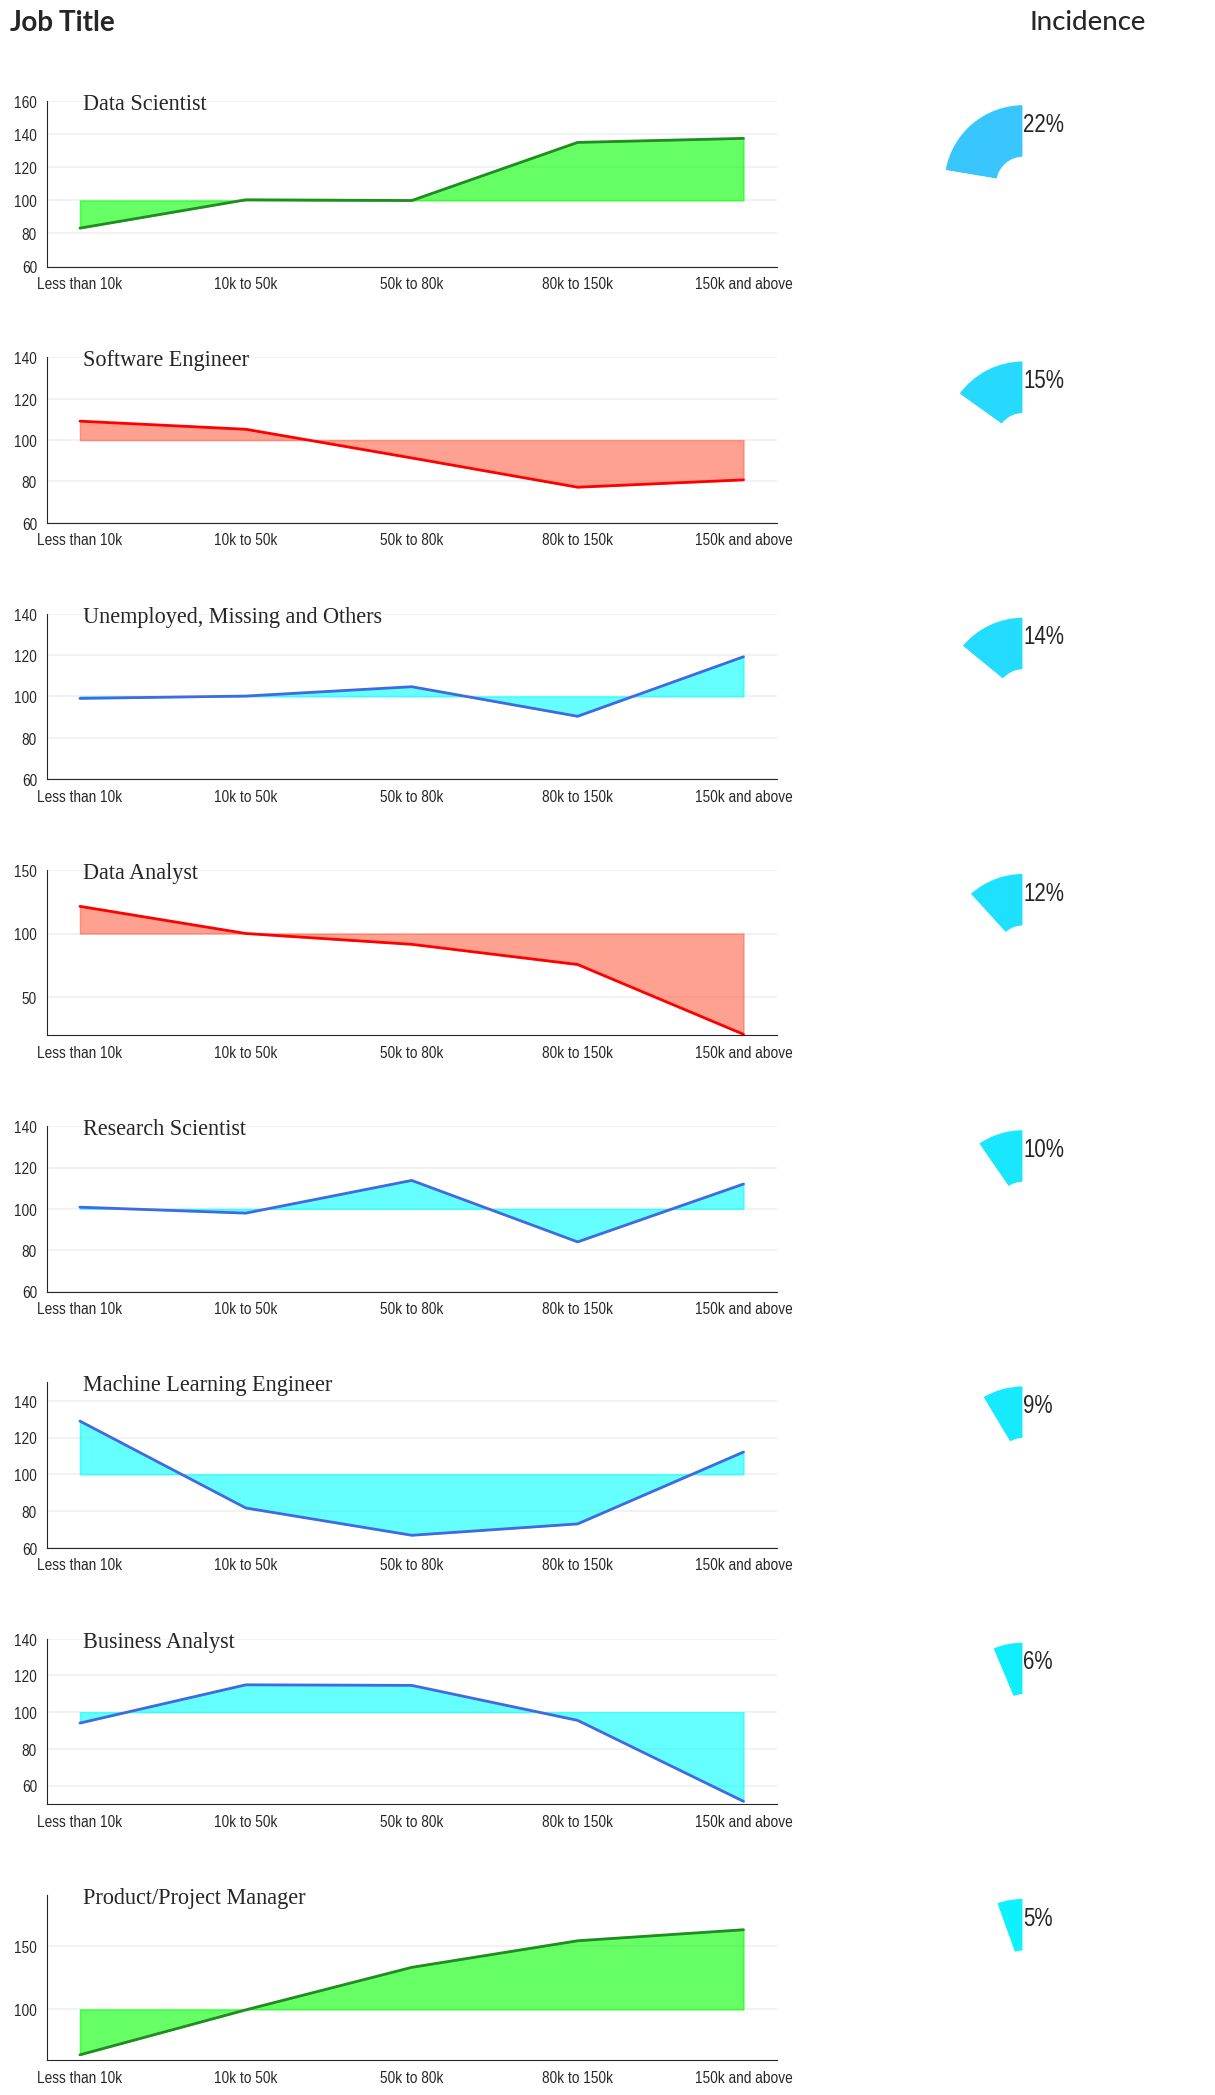

In [12]:
# Job Title

kaggle_2020["Job Title"].fillna("Missing", inplace = True)
kaggle_2020["Job Title"] = kaggle_2020["Job Title"].apply(lambda x: "Unemployed, Missing and Others" if x in ["Currently not employed", "Missing", "Other"] else x)
job_list = cross_tab_mat(kaggle_2020[["Earnings", "Job Title"]], "Earnings", "Job Title")
job_list.sort(key=lambda x: x[1], reverse = True)
create_plot(job_list, "Job Title")

While designations *might be deceptive*, they largely follow a trend similar to the Work Role. 

* Not all ML / DS roles pay equally. 
* Product Managment roles as expected, pay better compared to research and engineering roles
* I am curious to find out more about the Miscellaneous Category. 

#### 📌 *Actual work pays*

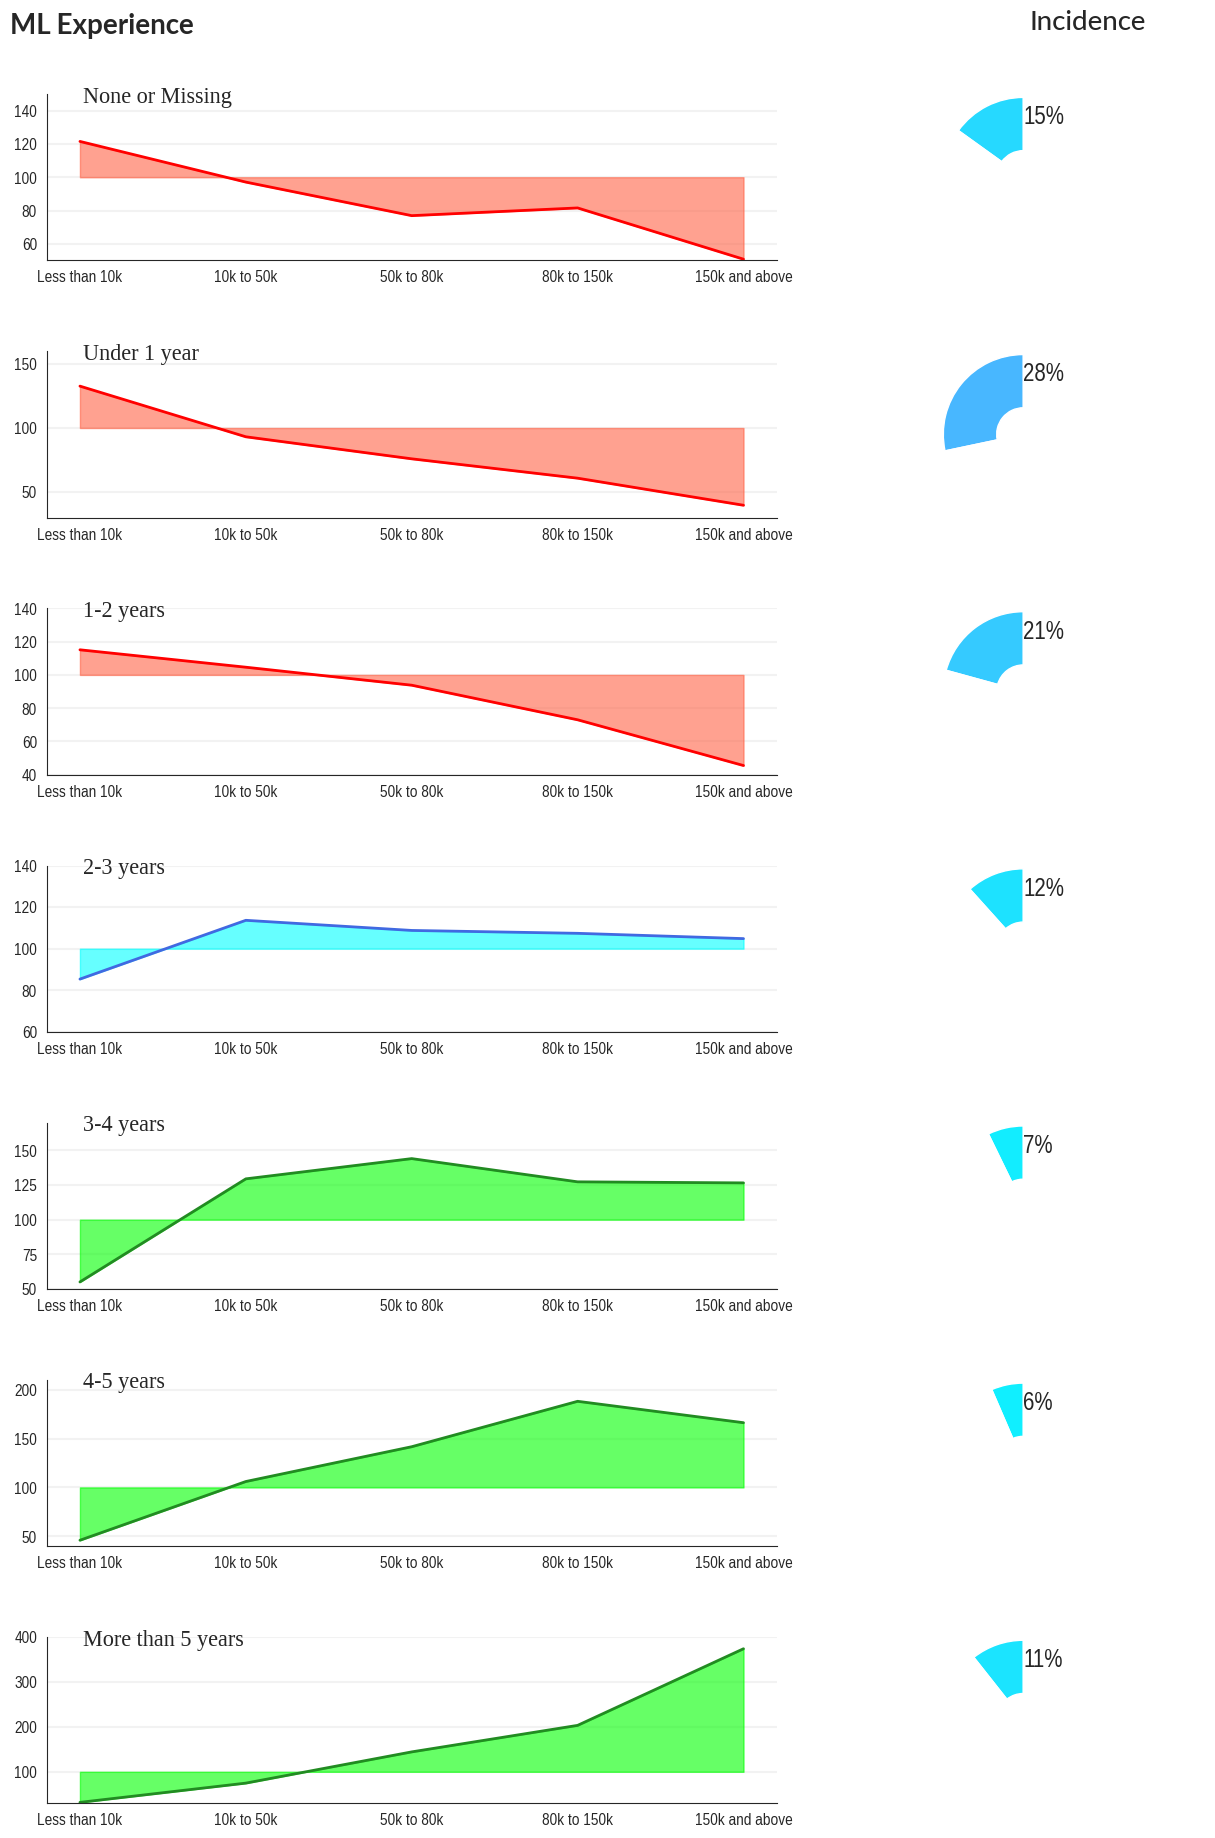

In [13]:
# ML Experience

kaggle_2020["ML Experience"].fillna("Missing", inplace = True)
kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].apply(lambda x: "None or Missing" if x in ["Missing", "I do not use machine learning methods"] else x)
kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].apply(lambda x: "More than 5 years" if x in ["5-10 years", "10-20 years", "20 or more years"] else x)

ml_exp_order = CategoricalDtype(
    ["None or Missing", "Under 1 year", "1-2 years","2-3 years", "3-4 years", "4-5 years", "More than 5 years"], 
    ordered=True
)
ml_exp_list = ["None or Missing", "Under 1 year", "1-2 years","2-3 years", "3-4 years", "4-5 years", "More than 5 years"]

kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].astype(ml_exp_order)
kaggle_2020.sort_values("ML Experience", inplace = True)
ml_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Experience"]], "Earnings", "ML Experience")
create_plot(ml_list, "ML Experience")

**There is no substitute for experience.**

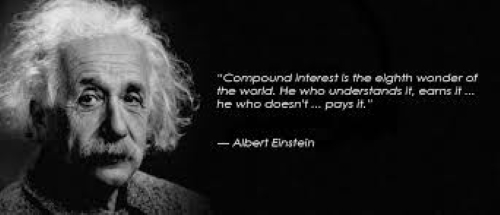

While courses and knowledge might bring short term bursts, to make it big, one needs to persevere. 

`As with every other profession, it takes time to succeed` 

#### 📌 *It is a marathon, not a sprint. Pace yourself and temper your expectations*

# Toolbox

* What are the skills needed to succeed in the field?
* What is the basic requirement? 
* And what are the game changing tools?

In [14]:
# Programming Skills

major_progs = ['Python','R','SQL']
minor_progs = ['C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash','MATLAB', 'Progamming None', 'Programming Other']

major_prog_list = []
for list_val in major_progs:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", list_val)
    if ct_out[1] >= 0.1:
        major_prog_list.append(ct_out)

# sort output list
major_prog_list.sort(key = lambda x:x[1], reverse = True)

minor_prog_list = []
for list_val in minor_progs:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", list_val)
    if ct_out[1] >= 0.1:
        minor_prog_list.append(ct_out)

# sort output list
minor_prog_list.sort(key = lambda x:x[1], reverse = True)


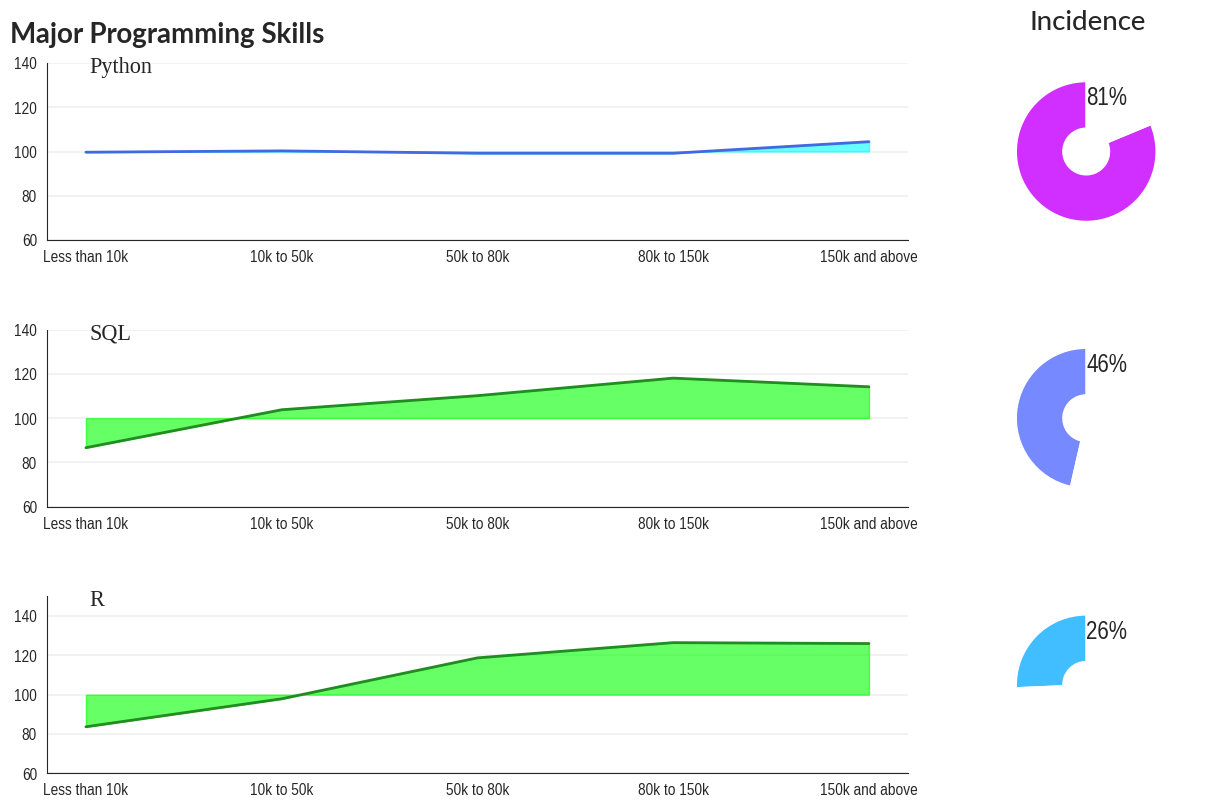

In [15]:
create_plot(major_prog_list, "Major Programming Skills")


* As discussed earlier, Python is ubiquitous.
* R is not a bad second language to learn. 
* SQL remains the every green tool. 
* With greater emphasis on execution, you can't go wrong with SQL. 

#### 📌 Everyone and their cat is learning Python, you too will have to

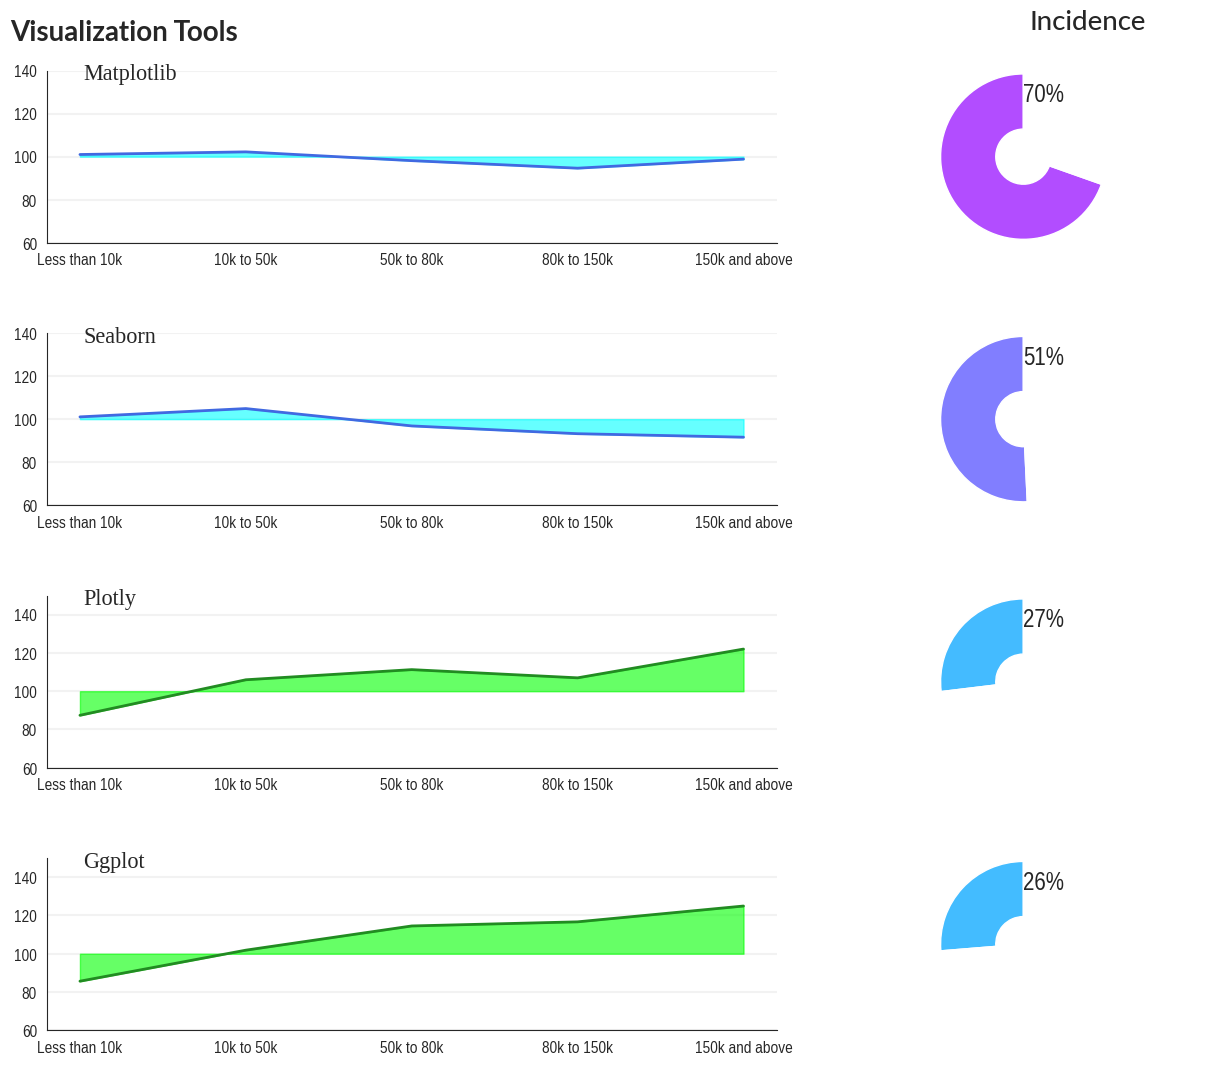

In [16]:
# Visualization

visual_list = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair',
               'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'Visualization None', 'Visualization Other']
visual_out = ['Matplotlib', 'Seaborn', 'Plotly', 'Ggplot', 'Shiny', 'D3 js', 'Altair',
              'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'Visualization None', 'Visualization Other']

visual_usage_list = []
i = 0
for list_val in visual_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", visual_out[i])
    if ct_out[1] >= 0.1:
        visual_usage_list.append(ct_out)
    i +=1

# sort output list
visual_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(visual_usage_list, "Visualization Tools")



* Matplotlib and Seaborn are becoming too commonplace.
* ggplot follows the R trend. If you are from the R world, learn ggplot. 

#### 📌 **Ploltly perhaps the next big visualization tool in the Python universe.**


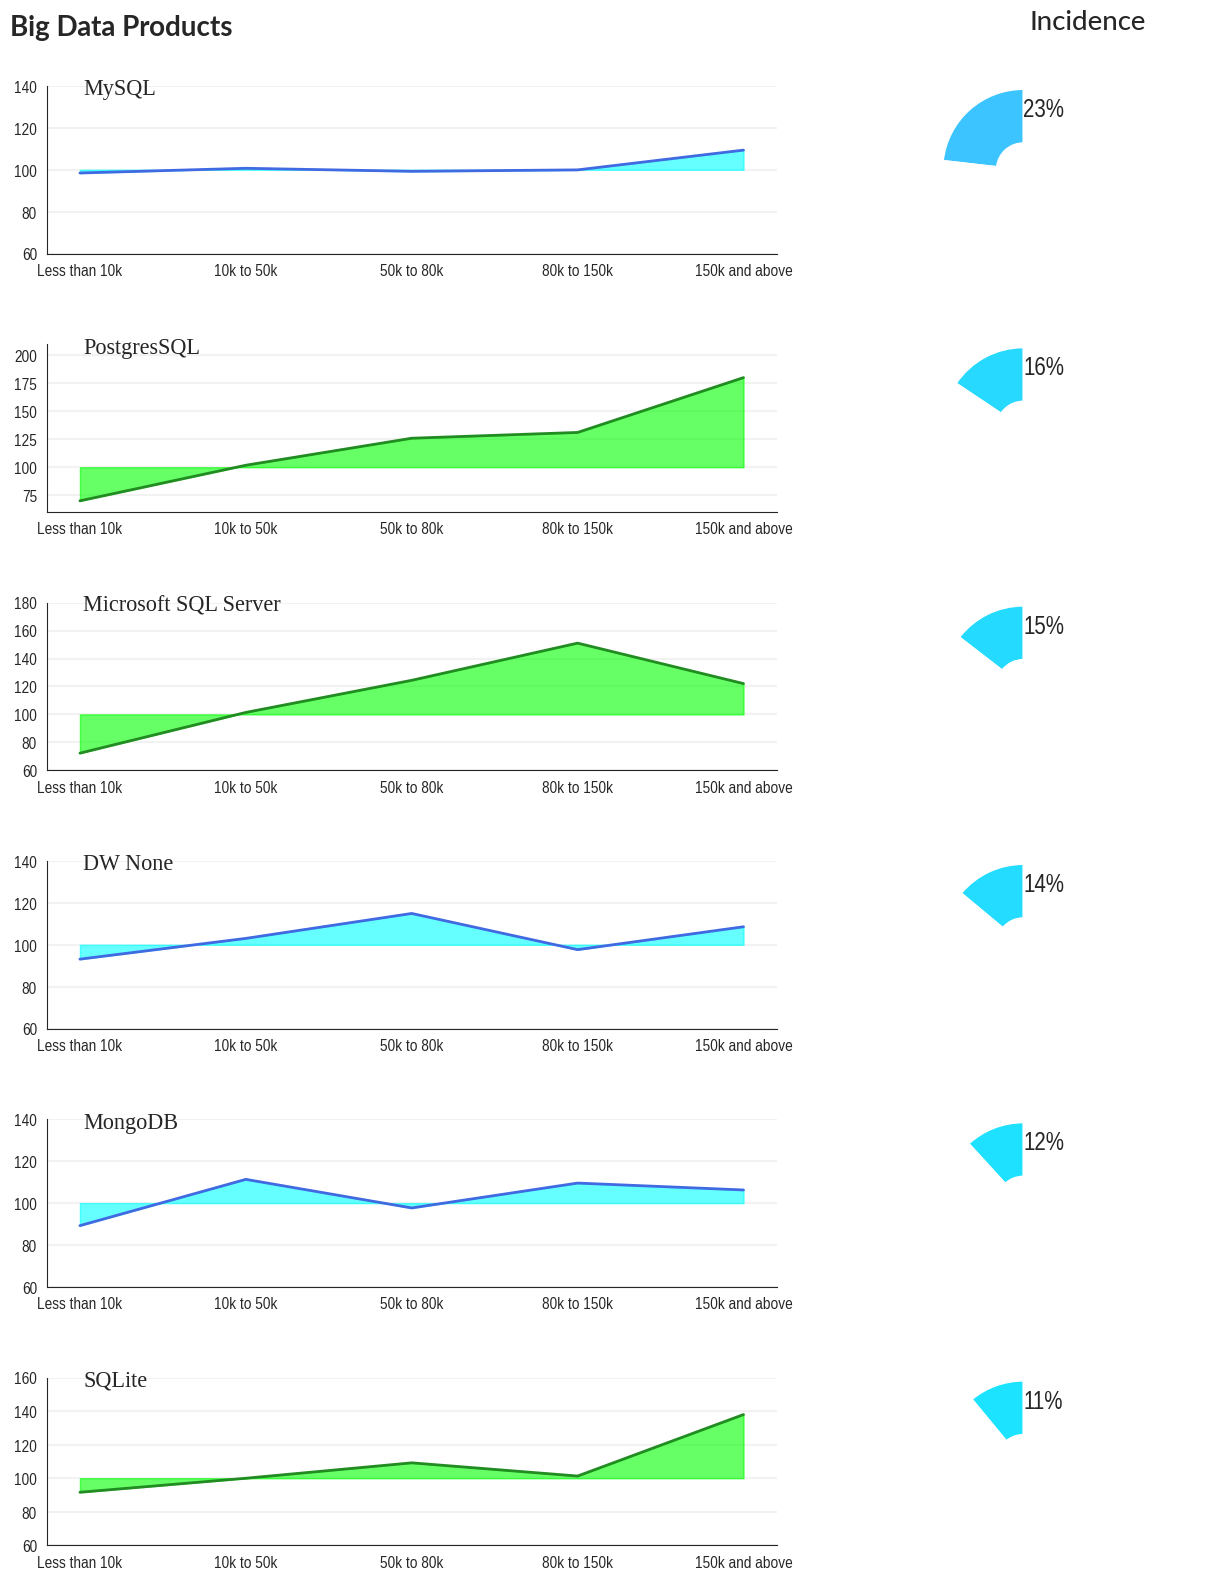

In [17]:
# Big Data Products

big_data_list = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'DW None', 'DW Other']
big_data_out = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'DW None', 'DW Other']


big_data_usage_list = []
i = 0
for list_val in big_data_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", big_data_out[i])
    if ct_out[1] >= 0.1:
        big_data_usage_list.append(ct_out)
    i +=1

# sort output list
big_data_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(big_data_usage_list, "Big Data Products")

* The traditional SQL daabases (mySQL, MS-SQL and PostgreSQL still dominate. 
* MongoDB and noSQL databases are taking time to rise up the usage charts. 

#### 📌**Databases don't change much. Do they?**

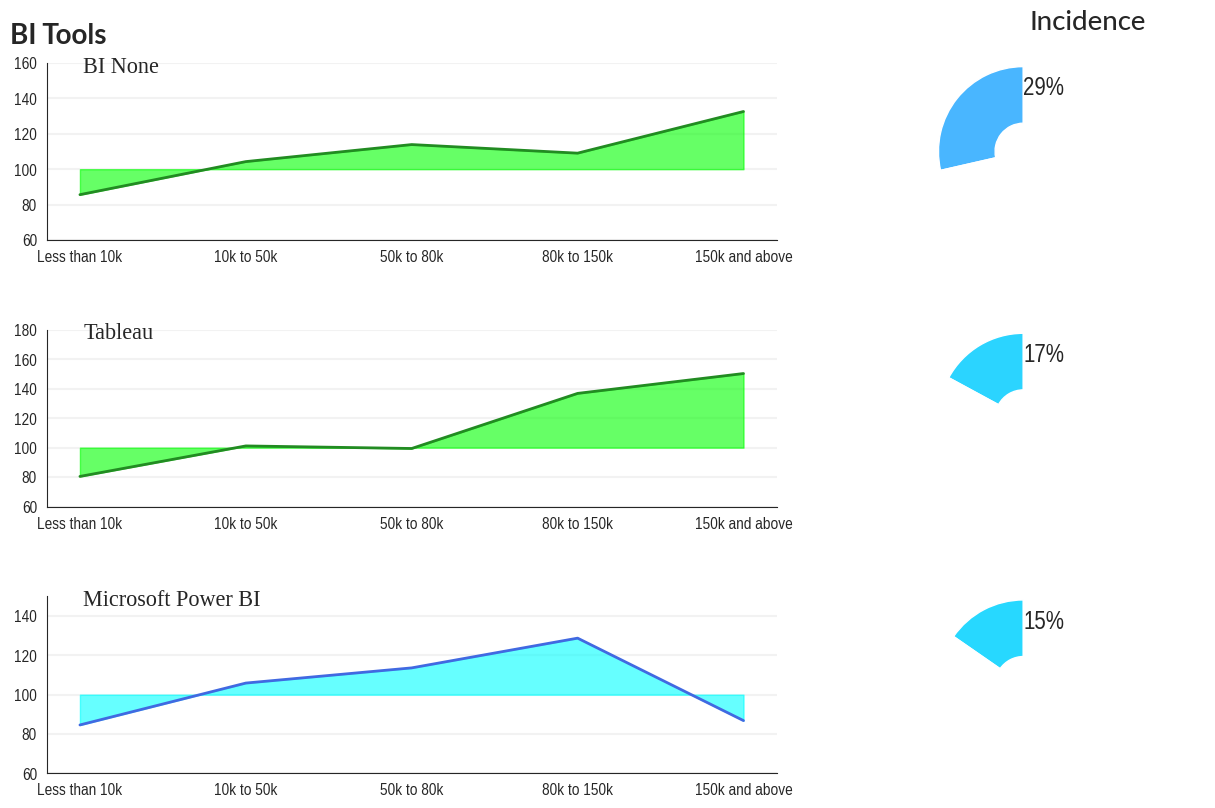

In [18]:
# BI Tools

bi_tools_list = ['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce',
'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud',
'BI None', 'BI Other']
bi_tools_out = ['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce',
'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud',
'BI None', 'BI Other'
]


bi_tools_usage_list = []
i = 0
for list_val in bi_tools_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", bi_tools_out[i])
    if ct_out[1] >= 0.1:
        bi_tools_usage_list.append(ct_out)
    i +=1

# sort output list
bi_tools_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(bi_tools_usage_list, "BI Tools")

* Since very few analysts earn big bucks, around a third of the respondents reported no BI experience. 
* The usage of BI tools drop in the higher earnings bucket. 
* Tableau and Power BI are the tools of choice of you want Data Analyst roles. 

#### 📌  **The BI tool usage probably follow the Job roles.**

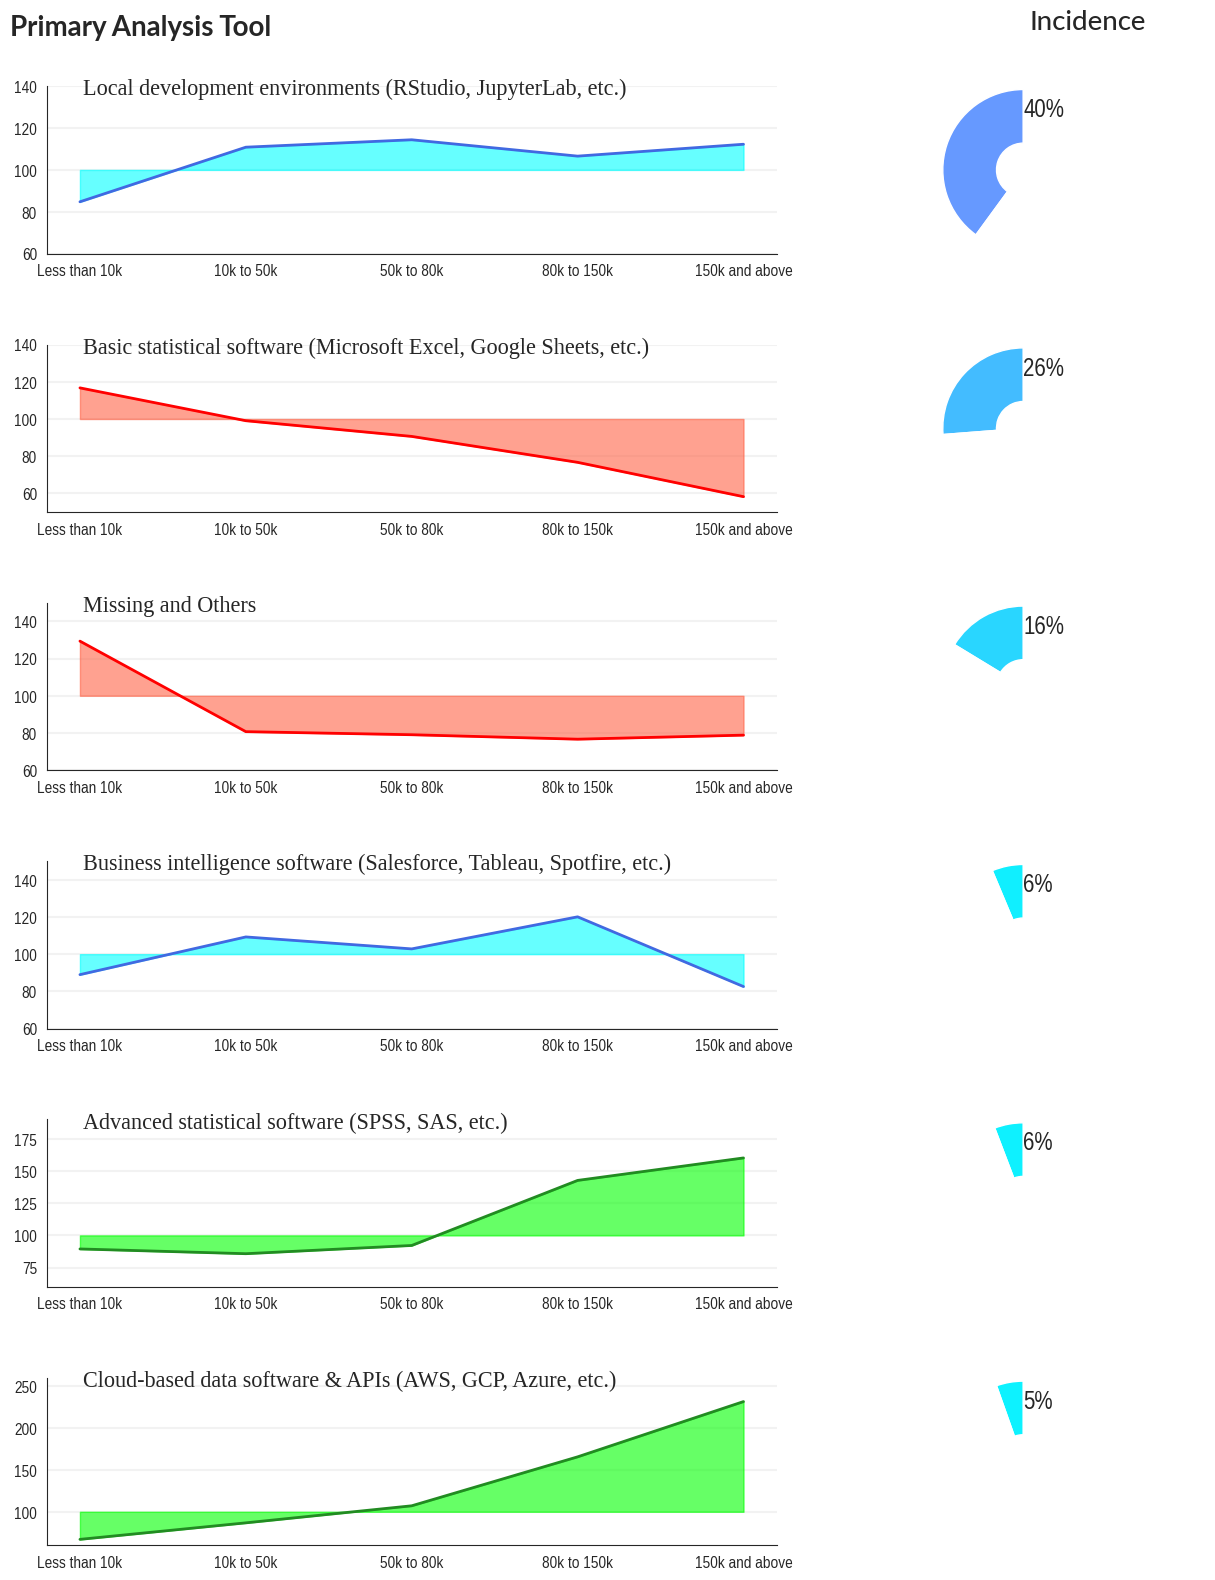

In [19]:
# Primary Analysis Tool

kaggle_2020["Primary Analysis Tool"].fillna("Missing", inplace = True)
kaggle_2020["Primary Analysis Tool"] = kaggle_2020["Primary Analysis Tool"].apply(lambda x: "Missing and Others" if x in ["Missing", "Other"] else x)
analysis_tool_list = cross_tab_mat(kaggle_2020[["Earnings", "Primary Analysis Tool"]], "Earnings", "Primary Analysis Tool")
analysis_tool_list.sort(key=lambda x: x[1], reverse = True)
create_plot(analysis_tool_list, "Primary Analysis Tool")

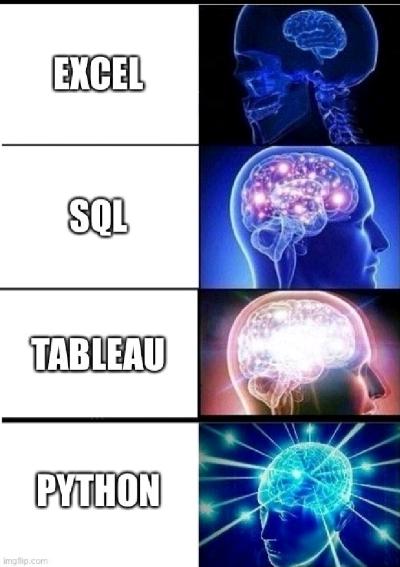

* Data science is truly expanding. Even hitherto indispensable tools like Excel are declining. 
* SAS and SPSS still find value at the top end. It shows the prevalance of SAS in large companies. 

#### 📌 In the Data Science world, spreadsheets are for kids. 

# ML Skills

In this part we look at the Algorithms that set you apart. 

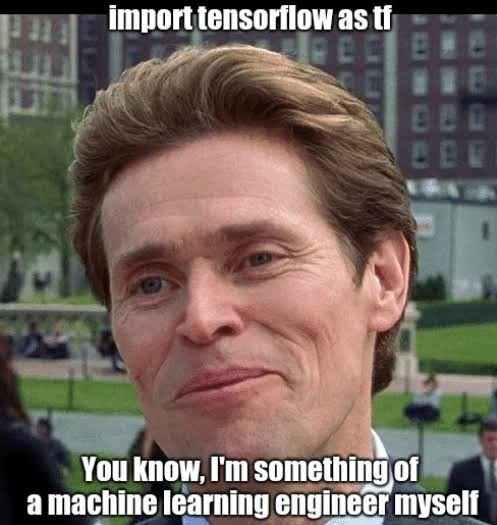


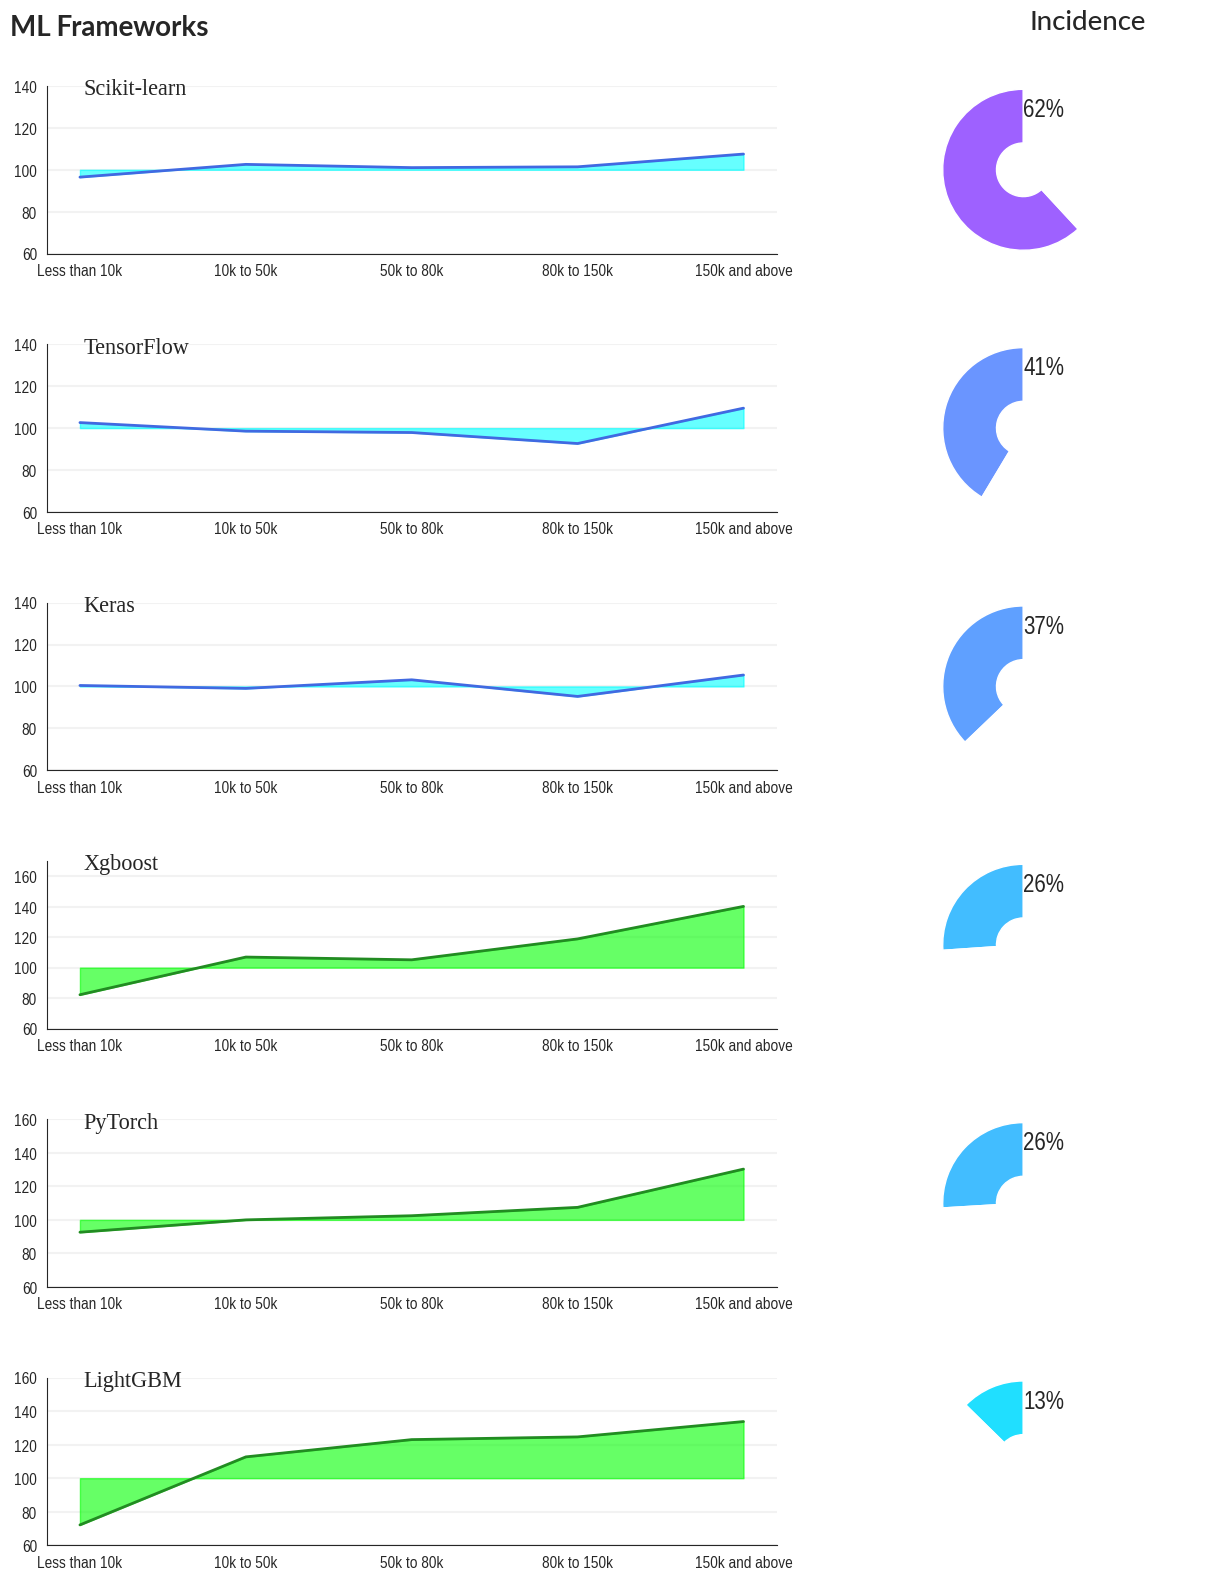

In [20]:
# ML Frameworks

ml_frame = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet',
'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'ML None', 'ML Other']

ml_frame_out = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet',
'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'ML None', 'ML Other'
]

ml_frame_list = []
i = 0
for list_val in ml_frame:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_frame_out[i])
    if ct_out[1] >= 0.1:
        ml_frame_list.append(ct_out)
    i +=1

# sort output list
ml_frame_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_frame_list, "ML Frameworks")

* Scikit learn is your first step to Data Science. So get comfortable with it. 
* TF and Keras too are finding wide usage. 
* PyTorch is the new shiny toy in the ML world. So you might see a lot of resumes with PyTorch proficiency next year. 

#### 📌 **Scikit Learn is to ML what matplotlib is to visualization**


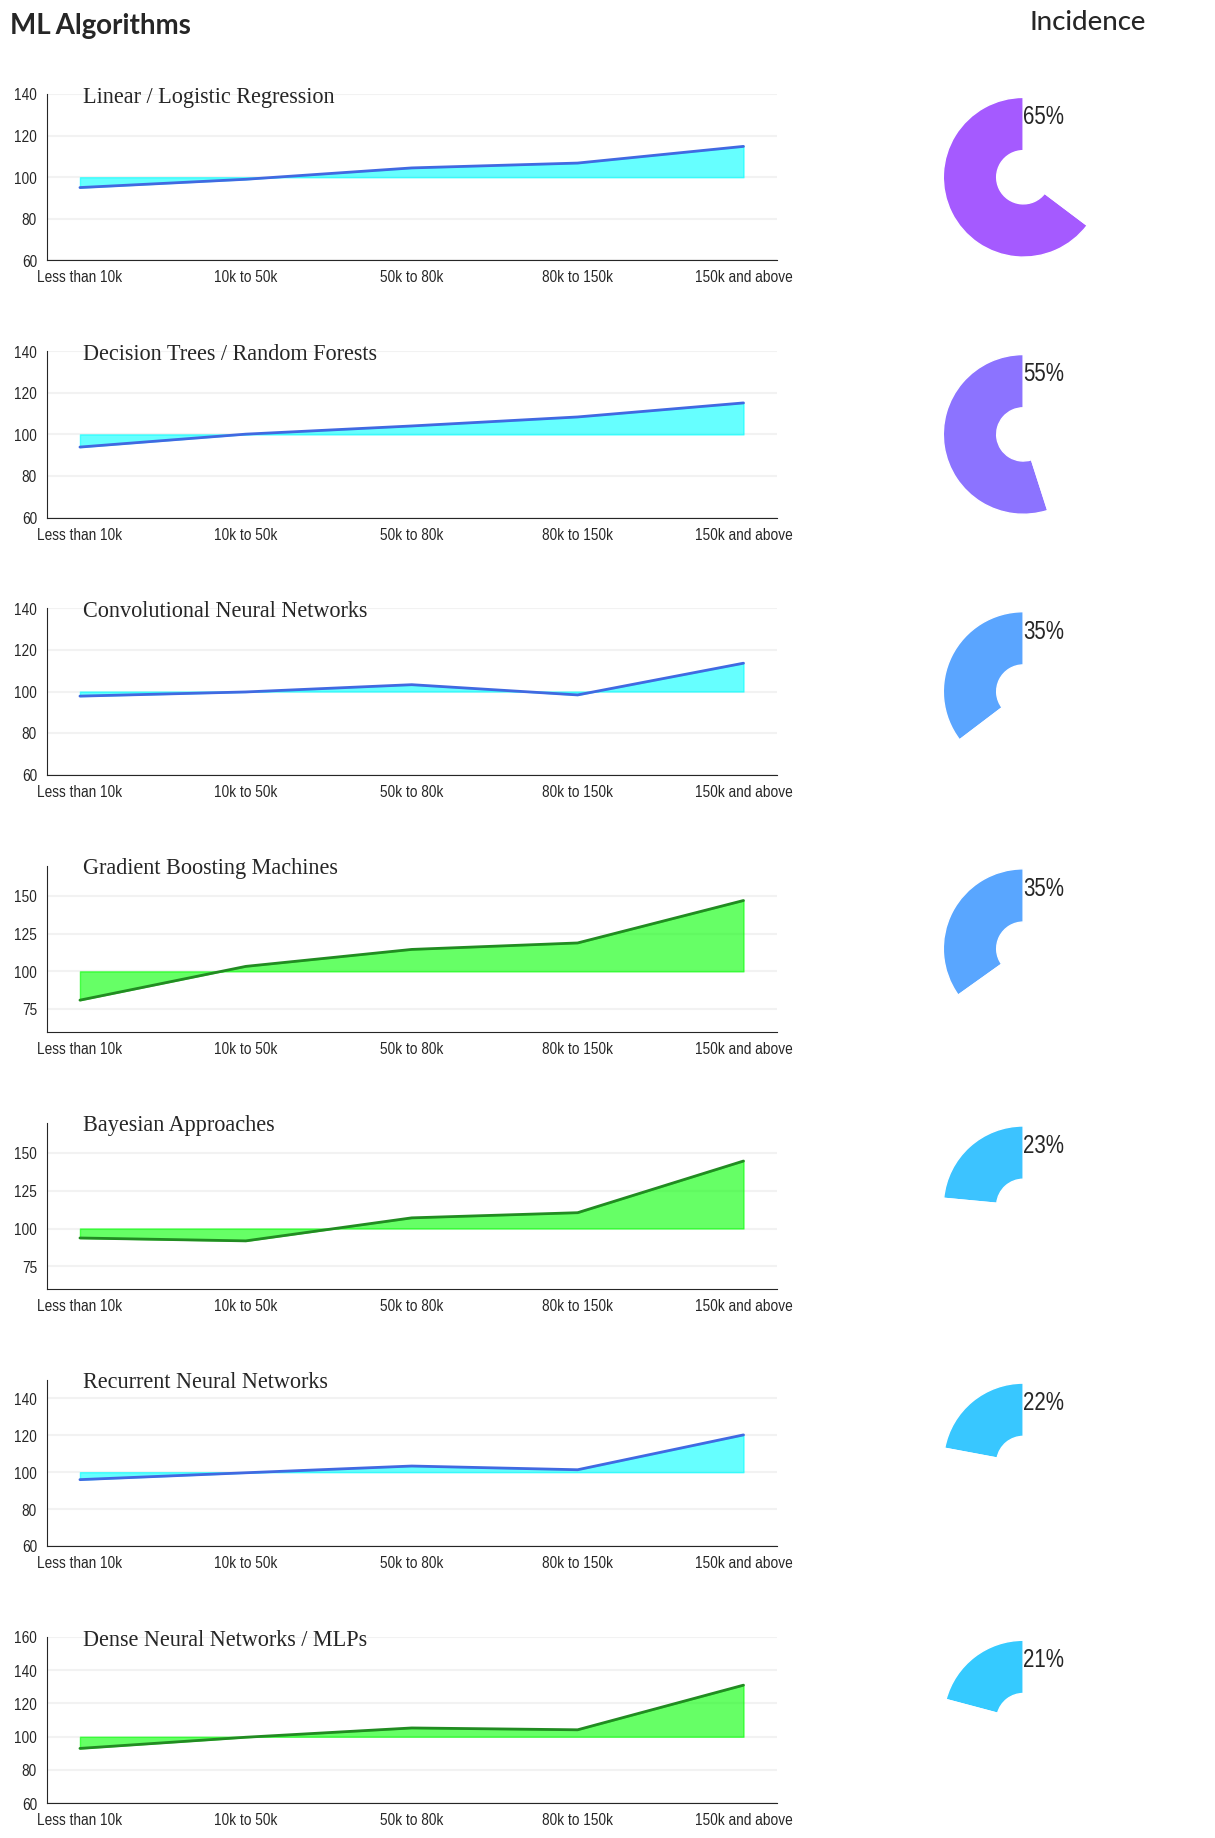

In [21]:
# ML Algorithms

ml_algo = ['Linear or Logistic Regression','Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks',
'Generative Adversarial Networks','Recurrent Neural Networks','Transformer Networks (BERT, gpt-3, etc)',
'ML Algorithms None','ML Algo Other']

ml_algo_out = ['Linear / Logistic Regression','Decision Trees / Random Forests', 'Gradient Boosting Machines',
'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks / MLPs', 'Convolutional Neural Networks',
'Generative Adversarial Networks','Recurrent Neural Networks','Transformer Networks','ML Algorithms None','ML Algo Other'
]

ml_algo_list = []
i = 0
for list_val in ml_algo:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_algo_out[i])
    if ct_out[1] >= 0.1:
        ml_algo_list.append(ct_out)
    i +=1

# sort output list
ml_algo_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_algo_list, "ML Algorithms")

* Regression and Forests are everywhere. 
* It is surprising to see Neural Networks being used so widely. Shows how quickly technologies become commonplace. 



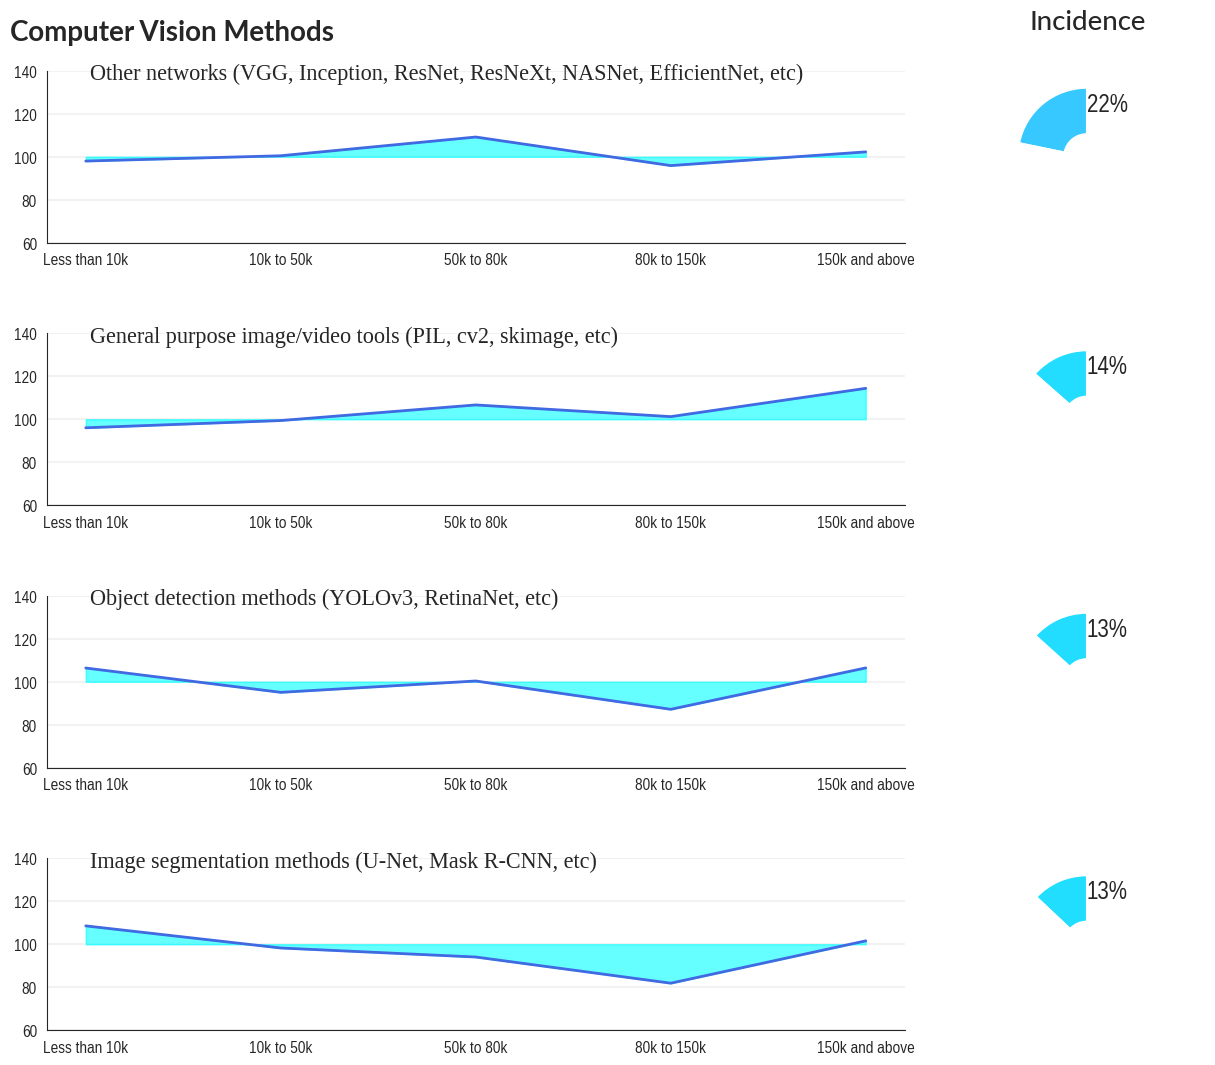

In [22]:
# Computer Vision Methods

cv_methods = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
'Object detection methods (YOLOv3, RetinaNet, etc)', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
'Generative Networks (GAN, VAE, etc)', 'CV None', 'CV Other',
]

cv_methods_out = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
'Object detection methods (YOLOv3, RetinaNet, etc)', 'Other networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
'Generative Networks (GAN, VAE, etc)', 'CV None', 'CV Other']


cv_methods_list = []
i = 0
for list_val in cv_methods:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", cv_methods_out[i])
    if ct_out[1] >= 0.1:
        cv_methods_list.append(ct_out)
    i +=1

# sort output list
cv_methods_list.sort(key = lambda x:x[1], reverse = True)

create_plot(cv_methods_list, "Computer Vision Methods")


* As with neural networks, CV algorithms too are being adopted quickly. 

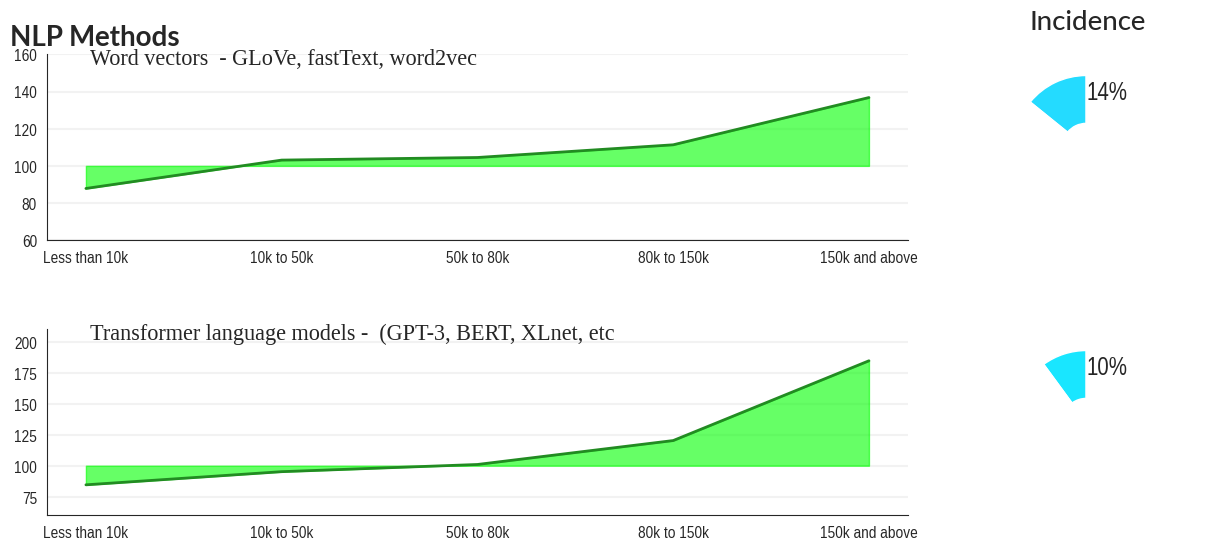

In [23]:
# NLP Tools

nlp_methods = ['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Encoder-decorder models (seq2seq, vanilla transformers)',
               'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)',
               'NLP None', 'NLP Other']

nlp_methods_out = ['Word vectors  - GLoVe, fastText, word2vec',
'Encoder-decorder models - seq2seq, vanilla transformers',
'Contextualized embeddings - ELMo, CoVe',
'Transformer language models -  (GPT-3, BERT, XLnet, etc',
'NLP None', 'NLP Other']


nlp_methods_list = []
i = 0
for list_val in nlp_methods:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", nlp_methods_out[i])
    if ct_out[1] >= 0.1:
        nlp_methods_list.append(ct_out)
    i +=1

# sort output list
nlp_methods_list.sort(key = lambda x:x[1], reverse = True)

create_plot(nlp_methods_list, "NLP Methods")



* Natural Language Processing is expected to be the next game changer. 
* If you are comfortable with regression and classification, NLP seems to be the next step. 

# Acquiring Skills

Now that we know what we need to pick up, where do we learn them from?

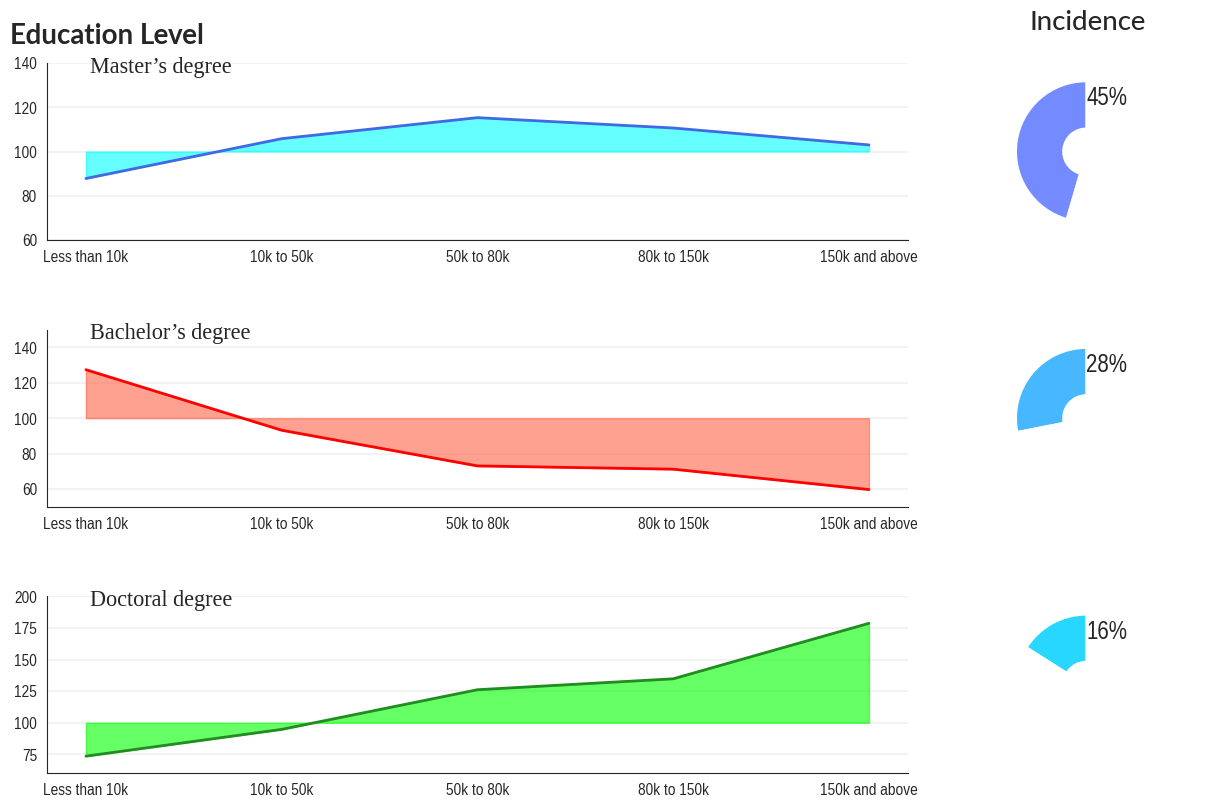

In [24]:
# Edication
edu_dict = {
    "Master’s degree" : "Master’s degree", "Bachelor’s degree" : "Bachelor’s degree",
    "Doctoral degree" : "Doctoral degree", 
    "Professional degree" : "Professional degree",
    "Some college/university study without earning a bachelor’s degree" : "Unfinished College",
    "Others": "Others", "I prefer not to answer" : "Others", 
    "No formal education past high school"  : "Others"
}

kaggle_2020["Education"] = kaggle_2020["Education Level"].replace(edu_dict)
education_list = cross_tab_mat(kaggle_2020[["Earnings", "Education"]], "Earnings", "Education")
education_list.sort(key=lambda x: x[1], reverse = True)
create_plot(education_list, "Education Level")


* Almost half the Data Sciene world has a master's degree

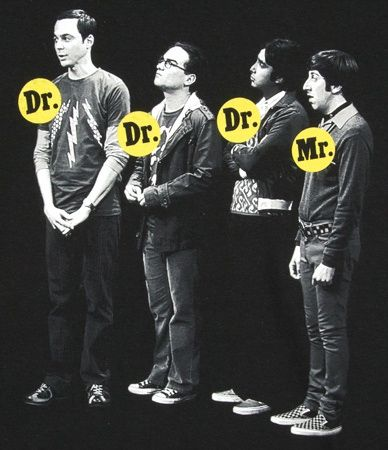

* With Indians constituting around a quarter of the respondents, Bachelor's Degree does not pay that much. 

* Doctoral programs pay off. 

#### 📌 *If you want to succeed in Data Science, study*

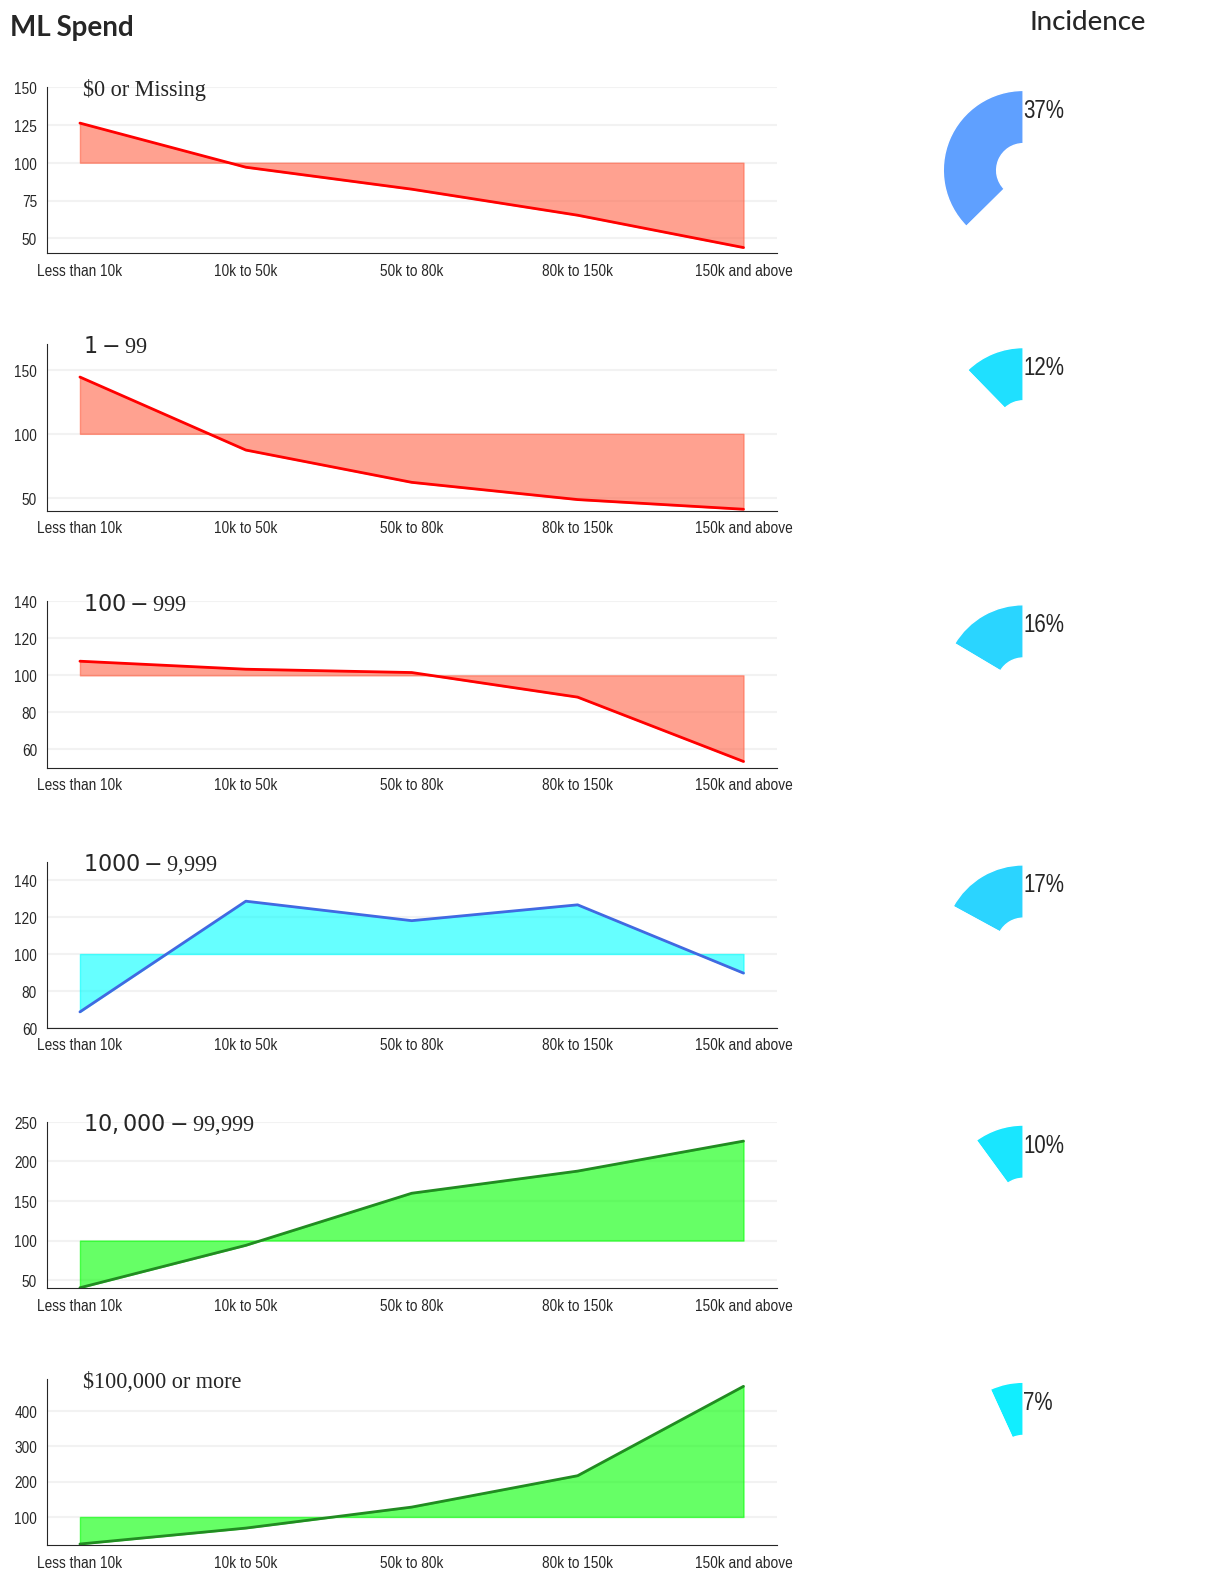

In [25]:
# ML Spend

kaggle_2020["ML Spend"].fillna("Missing", inplace = True)
kaggle_2020["ML Spend"] = kaggle_2020["ML Spend"].apply(lambda x: "$0 or Missing" if x in ["Missing", "$0 ($USD)"] else x)
kaggle_2020["ML Spend"] = kaggle_2020["ML Spend"].apply(lambda x: "$100,000 or more" if x in ["$100,000 or more ($USD)"] else x)


ml_spend_order = CategoricalDtype(
    ["$0 or Missing", "$1-$99", "$100-$999", "$1000-$9,999", "$10,000-$99,999", "$100,000 or more"], 
    ordered=True
)

ml_spend_list = ["$0 or Missing", "$1-$99", "$100-$999", "$1000-$9,999", "$10,000-$99,999", "$100,000 or more"]

kaggle_2020["ML Spend Order"] = kaggle_2020["ML Spend"].astype(ml_spend_order)
kaggle_2020.sort_values("ML Spend Order", inplace = True)
ml_spend_order_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Spend Order"]], "Earnings", "ML Spend Order")
create_plot(ml_spend_order_list, "ML Spend")


* Costly courses seem to pay off.
* The free courses might be popular, but they don't seem to add value

`This data is spend over last five years. And also includes company sponsored learning, so the high spends are not that surprising.`

#### 📌 **You get what you pay for. You have to spend money to earn money**

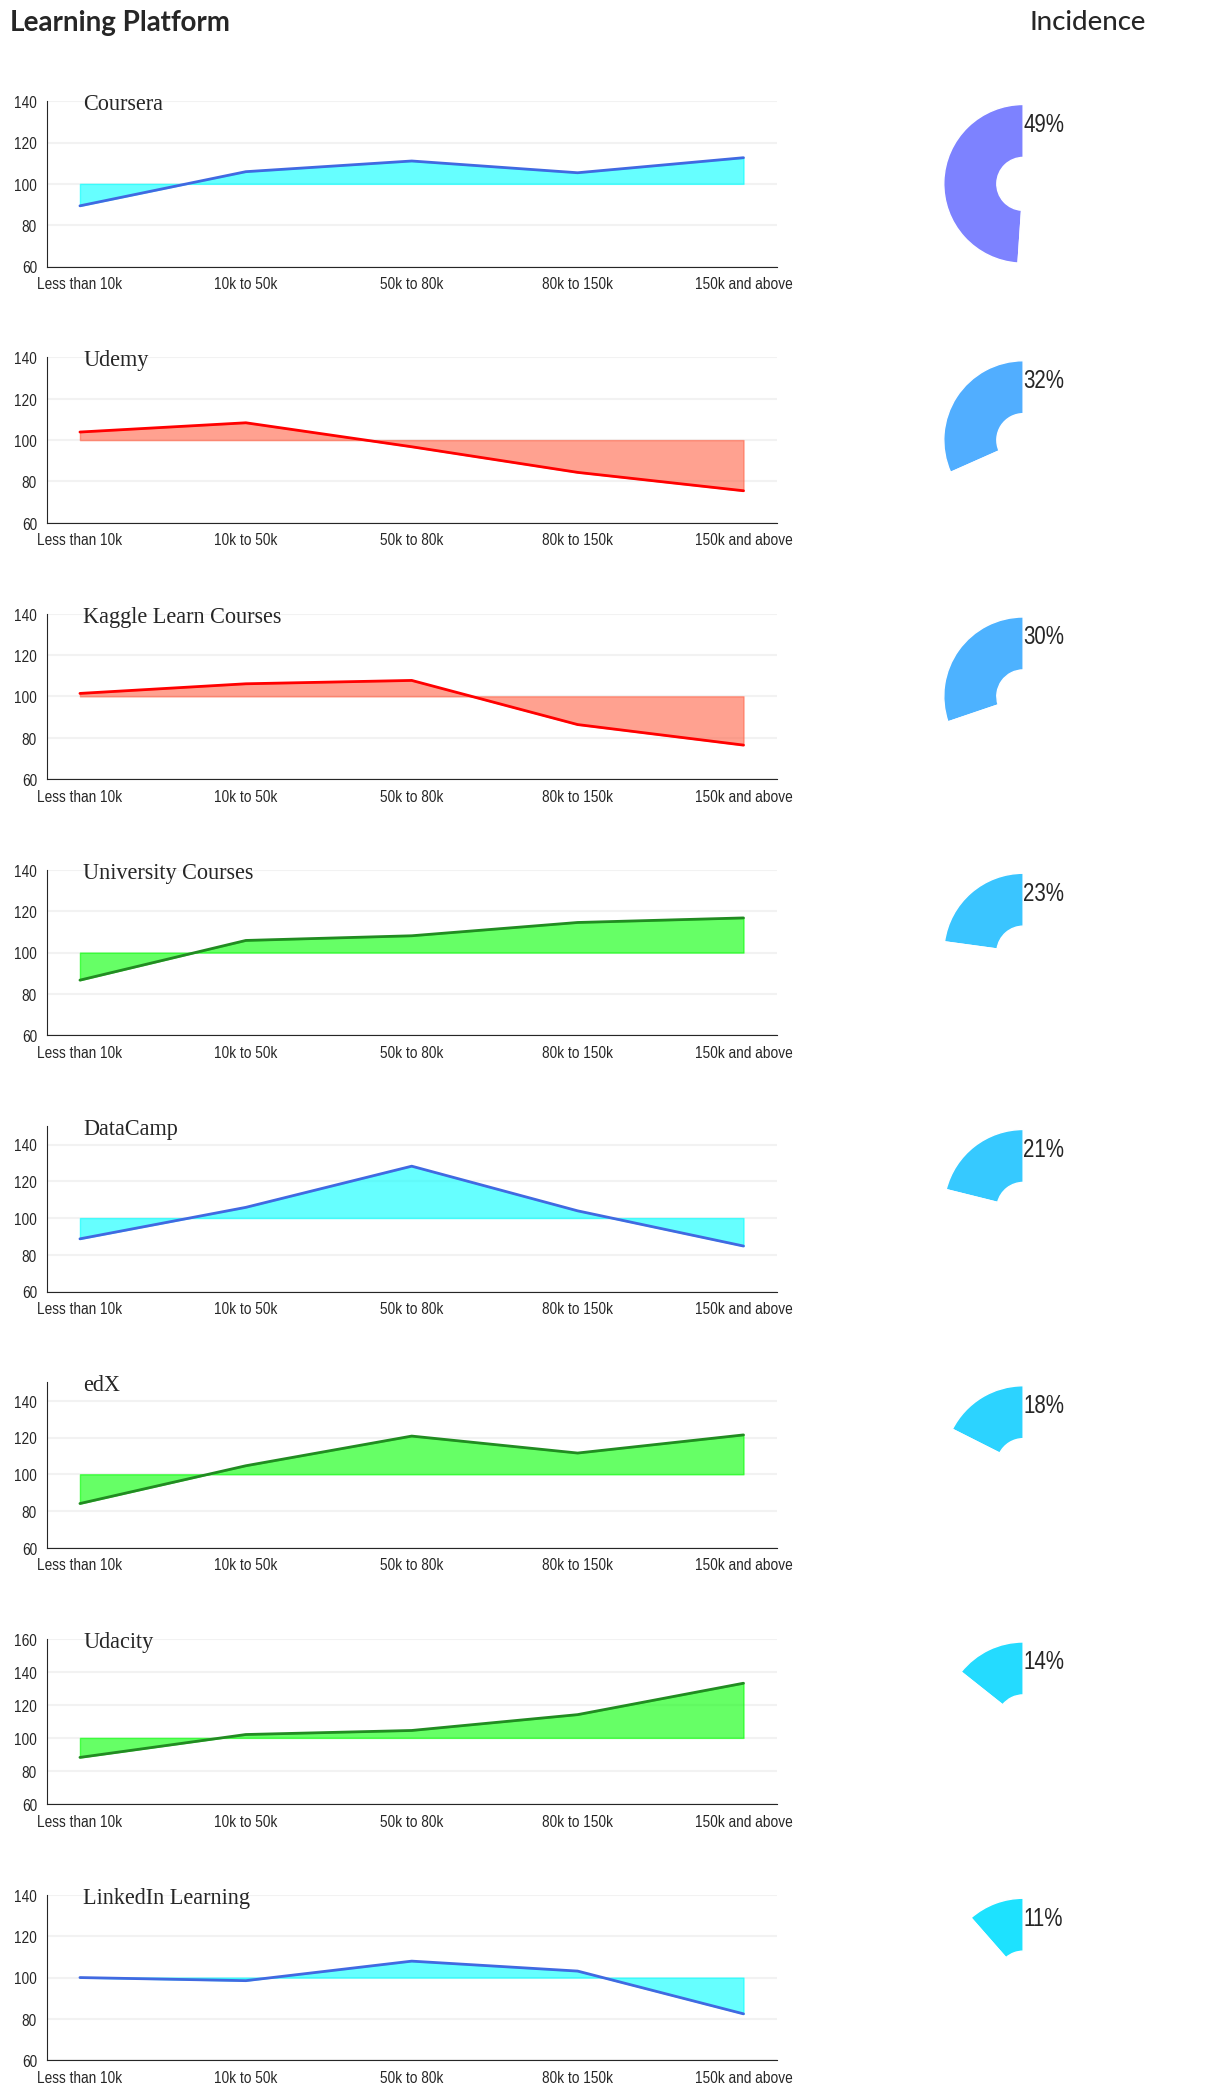

In [26]:
# ML Learning Platform

ml_learn_list = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai Learning', 'Udacity', 'Udemy',
'LinkedIn Learning','Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
'University Courses (resulting in a university degree)','Learn ML None',
'Learn ML Other']
ml_learn_out = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai Learning', 'Udacity', 'Udemy',
'LinkedIn Learning','Cloud-certification - AWS, Azure, GCP',
'University Courses','None',
'Others',
]

ml_learn_usage_list = []
i = 0
for list_val in ml_learn_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_learn_out[i])
    if ct_out[1] >= 0.1:
        ml_learn_usage_list.append(ct_out)
    i +=1

# sort output list
ml_learn_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_learn_usage_list, "Learning Platform")


* Free and low priced courses like Kaggle, Udemy are popular at the lower end. 
* Mid priced courses like DataCamp and LinkedIn learning are popular with mid-range earners. 
* Coursera is the most poplular of the large MOOCs with almost half of all respondents using it. 
* Almost a quarter of the respondents went to the University. 

#### 📌 **The platform choice reflects the spends**

# How to keep Learning

Data Science is fluid, so the professionals need to keep themselves continually updated. 

Here we look at their sharing and learning methods. 

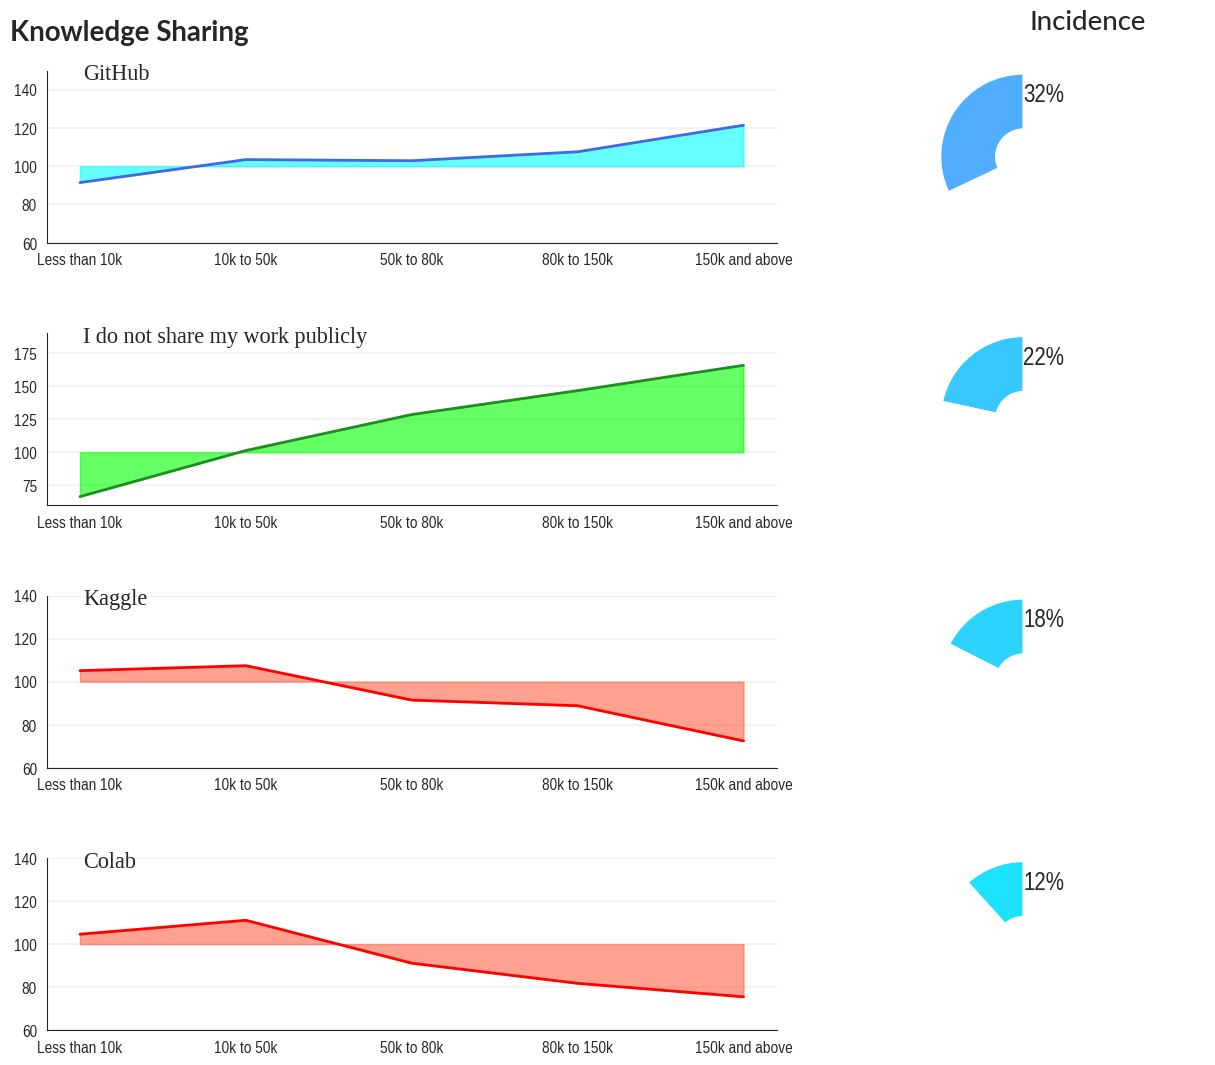

In [27]:
# Knowledge Sharing

sharing_list = ['Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal blog', 'Kaggle', 'Colab',
'Shiny Deploy', 'I do not share my work publicly', 'Deploy Other']
sharing_out = ['Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal blog', 'Kaggle', 'Colab',
'Shiny Deploy', 'I do not share my work publicly', 'Other'
]

sharing_usage_list = []
i = 0
for list_val in sharing_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", sharing_out[i])
    if ct_out[1] >= 0.1:
        sharing_usage_list.append(ct_out)
    i +=1

# sort output list
sharing_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(sharing_usage_list, "Knowledge Sharing")



* GitHub is the platform of choice. 
* A fifth of the respondents don't share. And their proportion increases with earnings. 
* Unfortunately both Kaggle and Colab suffer because of this. 

#### 📌 **The high earners need not be selfish. They simply might be busy with the additional work that comes with additional pay and responsibilites.** 


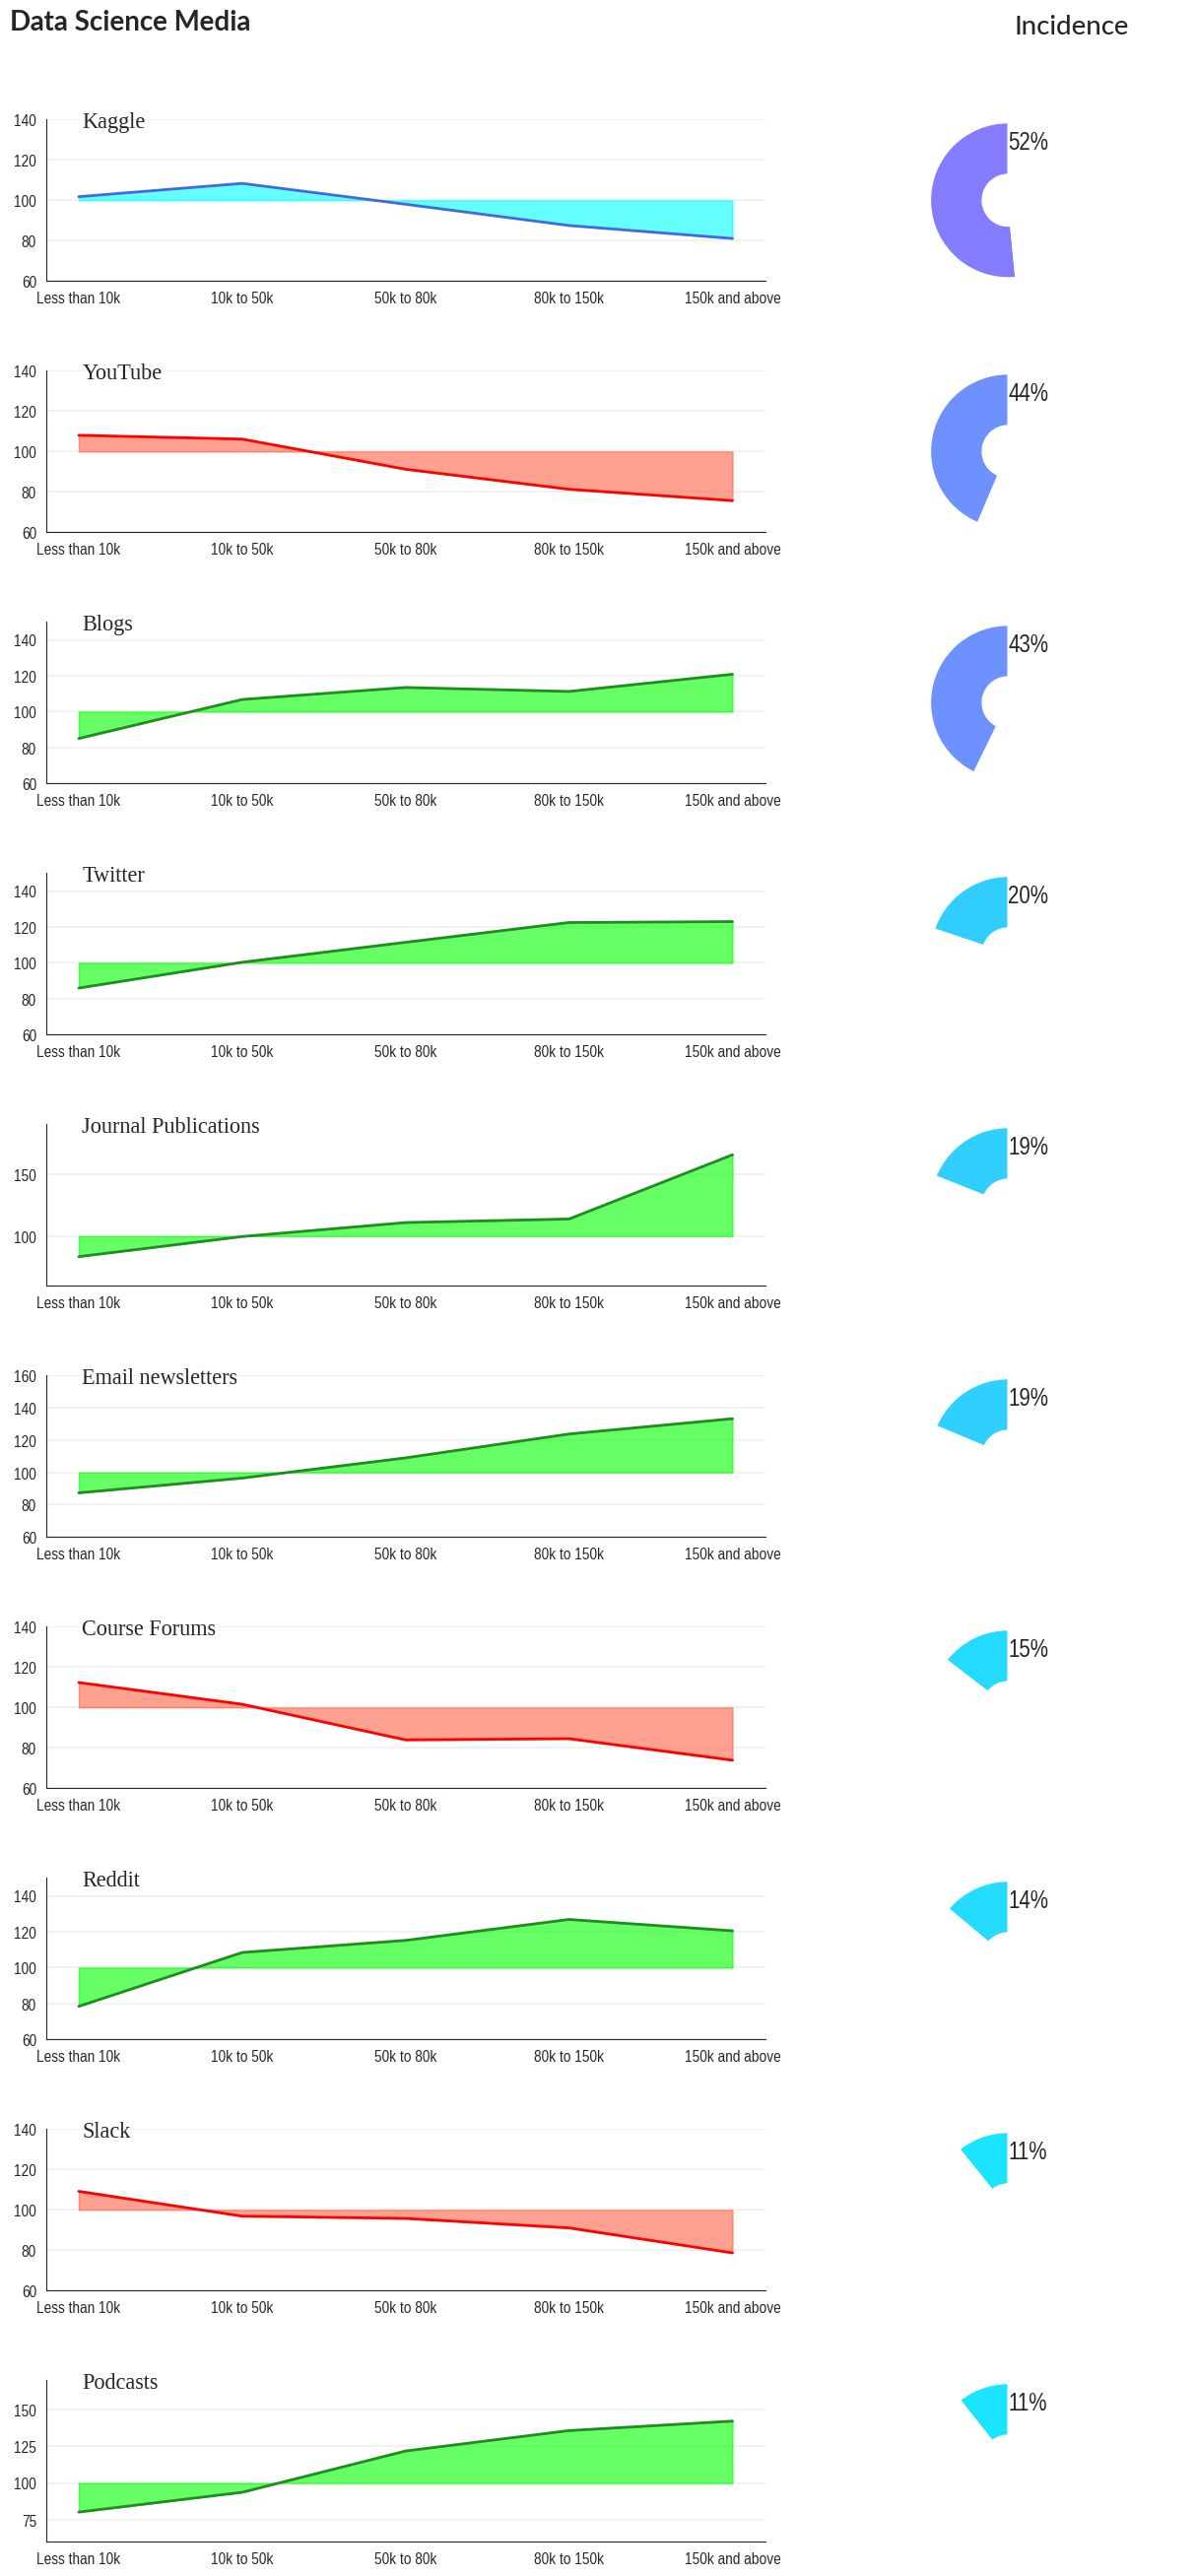

In [28]:
# Data Science Media

ds_media_list = ['Twitter (data science influencers)', "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
'Reddit (r/machinelearning, etc)', 'Kaggle (notebooks, forums, etc)', 'Course Forums (forums.fast.ai, Coursera forums, etc)',
'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)', 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
'Blogs (Towards Data Science, Analytics Vidhya, etc)', 'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
'Slack Communities (ods.ai, kagglenoobs, etc)', 'Media None', 'Media Other',
]


ds_media_out = ['Twitter', "Email newsletters", 'Reddit', 'Kaggle', 'Course Forums',
'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack', 'Media None', 'Media Other'
]

ds_media_usage_list = []
i = 0
for list_val in ds_media_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ds_media_out[i])
    if ct_out[1] >= 0.1:
        ds_media_usage_list.append(ct_out)
    i +=1

# sort output list
ds_media_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ds_media_usage_list, "Data Science Media")

* The media consumption trends follow the knowledge sharing trends.
* As Data Scientists get busy, they prefer one way communication like newsletters and articles versus community learning.



# Parting words

Data Science is a topsy turvy ocean. What seems like a continuing trend might change the next minute. We need to learn continuosly to stay on top. If you are new to Data Science, I hope this helps you figure out where to start. If you are an experienced professional, this might help you answer - What next?

The Kaggle Survey is a wonderful source of information about the Data Science / Machine Learning Community. This analysis helped strenghten some of my beliefs while also highlighting quite a few new things. 

I hope my analysis does justice to the data and you liked reading it as much as I did creating it. 

### **Thanks for reading and hope you have a safe and successful 2021!!**
